# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
plt.rc("font", size=12)
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_palette("Set2")
sns.set_style("white")
sns.set_style("ticks")
pd.set_option("display.max_columns", None)

# Importing Data

In [ ]:
registration = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/VOCPA Port/Final_Combined.xlsx","Registration")
pb_detention = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/VOCPA Port/Final_Combined.xlsx","PB_Detention")
idle = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/VOCPA Port/Final_Combined.xlsx","Idle_Timings")
performance = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/VOCPA Port/Final_Combined.xlsx","Performance")
operation = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/VOCPA Port/Final_Combined.xlsx","Operation_Handling")


In [ ]:
berth = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/VOCPA Port/berth_specs.csv")

# Working with necessary columns

In [ ]:
registration = registration.drop(['BALLAST_CARGO_BC','CREW','PARTY_CD','MAX_CALINV_AMD_NUMBER',"ORIGIN/DESTINATION", "CALINV_VCN",'REDUCED_GRT_MT','IMO_NUMBER',"VESSEL_NAME","VESSEL_TYPE","LAST_PORT","EXPECTED_DEPARTURE_DATE","CARGO_DESC","CALL_SIGN","NEXT_PORT_CALL","ANCHORAGE_DT","VOYAGE_NUMBER","SV_AGENT","BERTHING_DATE","CAPT","IW_PLT_BOARD_DT","IW_PLT_BERTH_DT","ZONE_ID","ASSESSMENT_DT","SAILED_DT","AGENT_NAME","REG_DT","COUNTRY_CODE","COUNTRY_NAME","LINE_CODE","LINE_AGENT_NM","ANC_DIRECT_BERTH_DT","DIRECT_BERTH","PRELIM_ASST_DT","REG_PORT","PURPOSE_OF_VISIT","SV_CODE","CARGO_CD"], axis=1)

In [ ]:
registration.columns

Index(['VESSEL_NO', 'C/B/DB/DC/L', 'O/C', 'MT_MV', 'STATUS_FOREIGN_COASTAL',
       'GRT_MT', 'NRT_MT', 'DWT_MT', 'LOA_METER', 'EXPECTED_ARRIVAL_DATE',
       'CARGO_TONNAGE', 'BEAM_METER', 'VESSEL_TYPENM', 'DRAFT_FWD',
       'DRAFT_AFT', 'BERTHING_BERTH_CODE', 'ASSESSED', 'REALISED',
       'SHIP_OPERATION_TYPE', 'PRIORITY', 'REQ_BERTH_CODE'],
      dtype='object')

In [ ]:
# num_unique_values = registration["PURPOSE_OF_VISIT"].nunique()
# registration["PURPOSE_OF_VISIT"].unique()

In [ ]:
pb_detention.columns

Index(['VESSEL_NO', 'VESSEL_NAME', 'BERTH', 'ANCHORAGE_DT', 'START_TIME',
       'END_TIME', 'DETENTION_HRS', 'REASON', 'PORT_ACCOUNT_YN'],
      dtype='object')

In [ ]:
pb_detention = pb_detention.drop(["VESSEL_NAME","START_TIME"], axis=1)

In [ ]:
idle.columns

Index(['VESSEL_NO', 'VESSEL_NAME', 'LOG_DATE', 'SAILED_DT', 'SHIFT', 'BERTH',
       'IDLE_REASON', 'IDLETIME', 'IDLE_MINS', 'REASON_CODE',
       'PRE_POST_DURING'],
      dtype='object')

In [ ]:
idle = idle.drop(['VESSEL_NAME', 'SAILED_DT','IDLETIME', 'REASON_CODE','PRE_POST_DURING'],axis=1)

In [ ]:
idle['IDLE_MINS']=idle['IDLE_MINS']/60
idle = idle.rename(columns={'IDLE_MINS': 'IDLE_HRS'})

In [ ]:
idle = idle[idle['BERTH'] != 'ZBB']

In [ ]:
idle

VESSEL_NO   LOG_DATE  SHIFT    BERTH                IDLE_REASON  \
0      20-21/1060 2021-04-01      1  14(CJI)  Stoppage Of Work By Agent   
1      20-21/1060 2021-04-01      2  14(CJI)  Stoppage Of Work By Agent   
2      20-21/1060 2021-04-01      3  14(CJI)  Stoppage Of Work By Agent   
3      20-21/1060 2021-04-02      1  14(CJI)  Stoppage Of Work By Agent   
4      20-21/1060 2021-04-02      2  14(CJI)  Stoppage Of Work By Agent   
...           ...        ...    ...      ...                        ...   
16661  21-22/1235 2022-03-30      1        9            Preparation-Pre   
16662  21-22/1235 2022-03-31      1        9  Documentation/Survey Post   
16663  21-22/1235 2022-03-31      2        9  Documentation/Survey Post   
16664  21-22/1235 2022-03-31      2        9    Preparation For Sailing   
16665  21-22/1235 2022-03-31      2        9            Pilotage (Port)   

       IDLE_HRS  
0      8.000000  
1      8.000000  
2      8.000000  
3      8.000000  
4      8.000000  
...         ...  
16661  0.166667  
16662  1.000000  
16663  1.000000  
16664  0.416667  
16665  0.166667  

[16666 rows x 6 columns]

In [ ]:
performance.columns

Index(['VCN', 'Vessel Name', 'Sailing Time', 'Norms', 'Berthing Time',
       'Vacation Time', 'Berth', 'Cargo', 'Quantity', 'Total Berthed Hrs',
       'Idle Hrs', 'Berth Hours in particular berth',
       'Service Hours in particular berth'],
      dtype='object')

In [ ]:
performance.rename(columns = {'VCN':'VESSEL_NO'}, inplace = True)

In [ ]:
performance = performance.drop(['Vessel Name','Sailing Time'],axis=1)

In [ ]:
# berth_dummies = pd.get_dummies(performance['Berth'])
# performance_Berths = pd.concat([performance, berth_dummies],axis = 1)
# performance_Berths = performance_Berths.drop('Berth', axis = 1)
# performance_Berths =  performance_Berths.groupby('VESSEL_NO').sum().reset_index()

In [ ]:
# performance_Berths = performance_Berths.drop(['Norms','Quantity',"Total Berthed Hrs","Idle Hrs",'Berth Hours in particular berth','Service Hours in particular berth'],axis=1)

In [ ]:
operation=operation.drop(['Vessel Name'],axis=1)

In [ ]:
performance

VESSEL_NO  Norms       Berthing Time       Vacation Time     Berth  \
0     20-21/1060   1363 2021-03-05 12:30:00 2021-04-08 13:30:00         5   
1     20-21/1060   1363 2021-03-05 12:30:00 2021-04-08 13:30:00   11(CBW)   
2     20-21/1088   3000 2021-03-07 12:42:00 2021-07-07 19:00:00         1   
3     20-21/1090   1363 2021-03-24 08:10:00 2021-04-02 07:30:00   11(CBW)   
4     20-21/1101   1363 2021-03-29 17:00:00 2021-04-02 11:30:00         5   
...          ...    ...                 ...                 ...       ...   
1355  21-22/1212  15000 2022-03-25 18:40:00 2022-03-29 07:35:00  16(CJII)   
1356  21-22/1217   2500 2022-03-27 23:06:00 2022-03-28 23:24:00         8   
1357  21-22/1220   2500 2022-03-27 08:32:00 2022-03-29 23:55:00  13(NCBI)   
1358  21-22/1222   2500 2022-03-29 00:36:00 2022-03-29 20:55:00         8   
1359  21-22/1235  33081 2022-03-30 05:06:00 2022-03-31 15:35:00         9   

                                         Cargo   Quantity  Total Berthed Hrs  \
0           CONSTRUCTION MATERIALS-STONE ROUGH   5500.000         817.000000   
1           CONSTRUCTION MATERIALS-STONE ROUGH   7000.000         817.000000   
2                                 FURNACE  OIL   7999.977        2934.300000   
3           CONSTRUCTION MATERIALS-STONE ROUGH   6500.000         215.333333   
4           CONSTRUCTION MATERIALS-STONE ROUGH   7350.000          90.500000   
...                                        ...        ...                ...   
1355             COAL HANDLED THROUGH CONVEYOR  26341.000          84.916667   
1356                                 Container  51954.010          24.300000   
1357                       COAL HANDLED AT NCB  72875.000          63.383333   
1358                                 Container  46576.700          20.316667   
1359  COAL FOR OTHER THAN THERMAL POWER PLANTS  53100.000          34.483333   

      Idle Hrs  Berth Hours in particular berth  \
0        41.58                       101.333333   
1        26.50                       119.500000   
2        13.15                        75.400000   
3       105.92                       215.333333   
4        23.50                        90.500000   
...        ...                              ...   
1355      9.25                        56.250000   
1356      0.00                        24.300000   
1357      4.39                        63.383333   
1358      0.00                        20.316667   
1359      4.58                        34.483333   

      Service Hours in particular berth  
0                             59.753333  
1                             93.000000  
2                             62.250000  
3                            109.413333  
4                             67.000000  
...                                 ...  
1355                          47.000000  
1356                          24.300000  
1357                          58.993333  
1358                          20.316667  
1359                          29.903333  

[1360 rows x 11 columns]

In [ ]:
# pd.set_option("display.max_columns", None)

## Changing into date and time

In [ ]:
#changing into date and time
# registration['BERTHING_DATE']= pd.to_datetime(registration['BERTHING_DATE'])
registration['EXPECTED_ARRIVAL_DATE']= pd.to_datetime(registration['EXPECTED_ARRIVAL_DATE'])
pb_detention['ANCHORAGE_DT'] = pd.to_datetime(pb_detention['ANCHORAGE_DT'])
idle['LOG_DATE'] = pd.to_datetime(idle['LOG_DATE'])
performance['Berthing Time'] = pd.to_datetime(performance['Berthing Time'])
performance['Vacation Time'] = pd.to_datetime(performance['Vacation Time'])
operation['Date']=pd.to_datetime(operation['Date'])

## Combining Different Sheets

In [ ]:
files = ['registration', 'pb_detention','idle','performance','operation']

In [ ]:
df = []
df.append(registration)
df.append(pb_detention)
df.append(idle)
df.append(performance)
df.append(operation)


In [ ]:
for i in range(len(df)):
    print(files[i])
    print(df[i].columns)

registration
Index(['VESSEL_NO', 'C/B/DB/DC/L', 'O/C', 'MT_MV', 'STATUS_FOREIGN_COASTAL',
       'GRT_MT', 'NRT_MT', 'DWT_MT', 'LOA_METER', 'EXPECTED_ARRIVAL_DATE',
       'CARGO_TONNAGE', 'BEAM_METER', 'VESSEL_TYPENM', 'DRAFT_FWD',
       'DRAFT_AFT', 'BERTHING_BERTH_CODE', 'ASSESSED', 'REALISED',
       'SHIP_OPERATION_TYPE', 'PRIORITY', 'REQ_BERTH_CODE'],
      dtype='object')
pb_detention
Index(['VESSEL_NO', 'BERTH', 'ANCHORAGE_DT', 'END_TIME', 'DETENTION_HRS',
       'REASON', 'PORT_ACCOUNT_YN'],
      dtype='object')
idle
Index(['VESSEL_NO', 'LOG_DATE', 'SHIFT', 'BERTH', 'IDLE_REASON', 'IDLE_HRS'], dtype='object')
performance
Index(['VESSEL_NO', 'Norms', 'Berthing Time', 'Vacation Time', 'Berth',
       'Cargo', 'Quantity', 'Total Berthed Hrs', 'Idle Hrs',
       'Berth Hours in particular berth', 'Service Hours in particular berth'],
      dtype='object')
operation
Index(['Vessel No', 'Date', 'Cargo', 'Cargo Category', 'Berth', 'Equipment',
       'Tonnage'],
      dtype='object

# Pivot Tables

In [ ]:
idle.head()

VESSEL_NO   LOG_DATE  SHIFT    BERTH                IDLE_REASON  IDLE_HRS
0  20-21/1060 2021-04-01      1  14(CJI)  Stoppage Of Work By Agent       8.0
1  20-21/1060 2021-04-01      2  14(CJI)  Stoppage Of Work By Agent       8.0
2  20-21/1060 2021-04-01      3  14(CJI)  Stoppage Of Work By Agent       8.0
3  20-21/1060 2021-04-02      1  14(CJI)  Stoppage Of Work By Agent       8.0
4  20-21/1060 2021-04-02      2  14(CJI)  Stoppage Of Work By Agent       8.0

Pre-Berthing Detention

In [ ]:
pivot_pb_detention = pd.pivot_table(pb_detention, index="VESSEL_NO",values=["ANCHORAGE_DT","DETENTION_HRS"], aggfunc={'ANCHORAGE_DT':"min","DETENTION_HRS":"sum"})

In [ ]:
pivot_pb_detention

ANCHORAGE_DT  DETENTION_HRS
VESSEL_NO                                    
20-21/1138 2021-04-12 15:15:00             16
20-21/1139 2021-04-12 15:15:00             16
20-21/1169 2021-04-02 07:30:00             28
20-21/1170 2021-04-05 10:30:00             34
20-21/1174 2021-04-03 04:42:00              3
...                        ...            ...
21-22/1223 2022-03-28 19:12:00             13
21-22/1224 2022-03-26 19:00:00             68
21-22/1228 2022-03-31 13:35:00             10
21-22/1235 2022-03-29 14:18:00             14
21-22/1236 2022-03-31 13:12:00              7

[517 rows x 2 columns]

Idle

In [ ]:
pivot_idle = pd.pivot_table(idle, index="VESSEL_NO",values=["LOG_DATE","IDLE_HRS"], aggfunc={'LOG_DATE':"min","IDLE_HRS":"sum"})

In [ ]:
pivot_idle

IDLE_HRS   LOG_DATE
VESSEL_NO                       
20-21/1060  82.000000 2021-04-01
20-21/1088  34.816667 2021-05-28
20-21/1090  15.250000 2021-04-01
20-21/1101  10.500000 2021-04-01
20-21/1138  24.583333 2021-04-13
...               ...        ...
21-22/1212  11.700000 2022-03-25
21-22/1220   4.383333 2022-03-27
21-22/1221  52.000000 2022-03-27
21-22/1224  18.916667 2022-03-29
21-22/1235   4.566667 2022-03-29

[707 rows x 2 columns]

Performance

In [ ]:
performance["Quantity_Norms"]=performance["Quantity"]/performance["Norms"]

In [ ]:
pivot_performance = pd.pivot_table(performance, index="VESSEL_NO",values=["Berth","Berthing Time","Quantity_Norms","Total Berthed Hrs","Idle Hrs","Berth Hours in particular berth","Service Hours in particular berth"], aggfunc={"Berth":"first","Berthing Time":"min","Quantity_Norms":"sum","Total Berthed Hrs":"mean","Idle Hrs":"sum","Berth Hours in particular berth":"sum","Service Hours in particular berth":"sum"})

#Feature Development

Expected number of Vessels

In [ ]:
#Expected number of vessels

# Get the count of vessels expected on the same date
registration['Congestion_Vessels_Expected'] = registration.groupby('EXPECTED_ARRIVAL_DATE')['VESSEL_NO'].transform('count')

In [ ]:
performance['month'] = performance['Berthing Time'].dt.month
registration['month'] = registration['EXPECTED_ARRIVAL_DATE'].dt.month

Berth Specs

In [ ]:
berth

Berth  Berth_Quay length  Berth_Permissible  Berth_Draught  Berth_DWT
0          1              168.0                183           9.30      25000
1          2              168.0                183           9.30      40000
2          3              192.0                245          11.50      50000
3          4              192.0                245          11.50      50000
4          5              168.0                183           8.60      40000
5          6              168.0                200           9.30      40000
6          7              370.0                270          11.70      50000
7          8              345.0                310          14.20      93000
8          9              334.5                235          14.20      93000
9    11(CBW)              318.0                225          13.00      65000
10  13(NCBI)              306.0                245          14.00      80000
11   14(CJI)              306.0                245          14.00      80000
12    15(OJ)              185.0                160           9.00      15000
13  16(CJII)              140.0                120           5.85       6000
14  17(EARM)              140.0                100           7.40       6000

In [ ]:
berth.columns

Index(['Berth', 'Berth_Quay length', 'Berth_Permissible', 'Berth_Draught',
       'Berth_DWT'],
      dtype='object')

In [ ]:
# berth = berth.rename(columns={'Berth': 'REQ_BERTH_CODE'})
berth.rename(columns = {'Berth':'REQ_BERTH_CODE'}, inplace = True)

In [ ]:
# berth.set_index('Berth', inplace=True)

In [ ]:
berth.dtypes

REQ_BERTH_CODE        object
Berth_Quay length    float64
Berth_Permissible      int64
Berth_Draught        float64
Berth_DWT              int64
dtype: object

In [ ]:
berth['REQ_BERTH_CODE'] = berth['REQ_BERTH_CODE'].astype(str)

In [ ]:
registration['REQ_BERTH_CODE'] = registration['REQ_BERTH_CODE'].astype(str)

In [ ]:
registration.REQ_BERTH_CODE.dtype

dtype('O')

In [ ]:
registration = pd.merge(registration,
                     berth,
                     on ='REQ_BERTH_CODE',
                     how ='left')

Circular Month

In [ ]:
registration['month_sin'] = np.sin(2 * np.pi * registration['month']/12)
registration['month_cos'] = np.cos(2 * np.pi * registration['month']/12)

# Port Limit Variables

In [ ]:
registration.sort_values(by='VESSEL_NO', ascending=True, inplace=True)
registration

VESSEL_NO C/B/DB/DC/L O/C MT_MV STATUS_FOREIGN_COASTAL   GRT_MT  \
944   20-21/1060       BARGE   O    MV                      F   5248.0   
1132  20-21/1088          LB   O    MT                      F  22184.0   
945   20-21/1090       BARGE   O    MV                      F   2985.0   
946   20-21/1101       BARGE   O    MV                      F   3147.0   
947   20-21/1138       BARGE   O    MV                      F   3138.0   
...          ...         ...  ..   ...                    ...      ...   
698   21-22/1212          DM   C    MV                      F  30811.0   
522   21-22/1217           C   O    MV                      F  15929.0   
699   21-22/1220          DM   C    MV                      F  38938.0   
523   21-22/1222           C   O    MV                      F  15095.0   
813   21-22/1235          DM   O    MV                      F  31117.0   

       NRT_MT   DWT_MT  LOA_METER EXPECTED_ARRIVAL_DATE  CARGO_TONNAGE  \
944    1574.0   2258.0     111.25   2021-02-27 08:00:00        12500.0   
1132   9431.0  34671.0     171.10   2021-03-07 00:00:00         7999.0   
945     896.0   7200.0      87.78   2021-03-20 10:00:00         7000.0   
946     944.0   7498.0      87.86   2021-03-29 08:00:00         7200.0   
947     941.0   7200.0      87.84   2021-04-03 08:00:00         7200.0   
...       ...      ...        ...                   ...            ...   
698   18205.0  55709.0     189.90   2022-03-25 10:00:00        52726.0   
522    9227.0  22026.0     167.95   2022-03-25 10:00:00        19000.0   
699   24972.0  74193.0     224.89   2022-03-26 23:55:00        72875.0   
523    6453.0  18585.0     168.80   2022-03-26 22:00:00        14000.0   
813   18182.0  53432.1     189.99   2022-03-29 14:00:00        53100.0   

      BEAM_METER                        VESSEL_TYPENM  DRAFT_FWD  DRAFT_AFT  \
944        28.04              BREAK BULK CARGO VESSEL       1.00       1.20   
1132       27.40     OIL AND OTHER DERIVATIVES TANKER       8.00       8.00   
945        24.38                                BARGE       1.00       1.20   
946        24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
947        24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
...          ...                                  ...        ...        ...   
698        32.26              BREAK BULK CARGO VESSEL      12.30      12.30   
522        26.70      CARRIER GENERAL CARGO/CONTAINER      10.50      10.00   
699        32.20              BREAK BULK CARGO VESSEL      14.00      14.00   
523        27.30  FULL CONTAINER SHIP/CELLULAR VESSEL       6.00       7.00   
813        32.26              BREAK BULK CARGO VESSEL      12.68      12.93   

     BERTHING_BERTH_CODE ASSESSED REALISED SHIP_OPERATION_TYPE PRIORITY  \
944                    5      Yes      Yes              Export            
1132                   1       No      Yes              Import            
945              11(CBW)      Yes      Yes              Export            
946                    5      Yes      Yes              Export            
947              11(CBW)      Yes      Yes              Export            
...                  ...      ...      ...                 ...      ...   
698             13(NCBI)      Yes      Yes              Import            
522                    8      Yes      Yes                Both            
699             13(NCBI)      Yes      Yes              Import            
523                    8       No      Yes                Both            
813                    9       No      Yes              Import            

     REQ_BERTH_CODE  Congestion_Vessels_Expected  month  Berth_Quay length  \
944               5                          1.0    2.0              168.0   
1132              6                          1.0    3.0              168.0   
945         11(CBW)                          1.0    3.0              318.0   
946         11(CBW)                          1.0    3.0            

Merging files to get all columns in a single dataframe

In [ ]:
merge1 = pd.merge(registration, pivot_performance[["Berth",'Quantity_Norms','Total Berthed Hrs', 'Idle Hrs','Service Hours in particular berth']], on='VESSEL_NO',how='left')

In [ ]:
merge1

VESSEL_NO C/B/DB/DC/L O/C MT_MV STATUS_FOREIGN_COASTAL   GRT_MT  \
0     20-21/1060       BARGE   O    MV                      F   5248.0   
1     20-21/1088          LB   O    MT                      F  22184.0   
2     20-21/1090       BARGE   O    MV                      F   2985.0   
3     20-21/1101       BARGE   O    MV                      F   3147.0   
4     20-21/1138       BARGE   O    MV                      F   3138.0   
...          ...         ...  ..   ...                    ...      ...   
1129  21-22/1212          DM   C    MV                      F  30811.0   
1130  21-22/1217           C   O    MV                      F  15929.0   
1131  21-22/1220          DM   C    MV                      F  38938.0   
1132  21-22/1222           C   O    MV                      F  15095.0   
1133  21-22/1235          DM   O    MV                      F  31117.0   

       NRT_MT   DWT_MT  LOA_METER EXPECTED_ARRIVAL_DATE  CARGO_TONNAGE  \
0      1574.0   2258.0     111.25   2021-02-27 08:00:00        12500.0   
1      9431.0  34671.0     171.10   2021-03-07 00:00:00         7999.0   
2       896.0   7200.0      87.78   2021-03-20 10:00:00         7000.0   
3       944.0   7498.0      87.86   2021-03-29 08:00:00         7200.0   
4       941.0   7200.0      87.84   2021-04-03 08:00:00         7200.0   
...       ...      ...        ...                   ...            ...   
1129  18205.0  55709.0     189.90   2022-03-25 10:00:00        52726.0   
1130   9227.0  22026.0     167.95   2022-03-25 10:00:00        19000.0   
1131  24972.0  74193.0     224.89   2022-03-26 23:55:00        72875.0   
1132   6453.0  18585.0     168.80   2022-03-26 22:00:00        14000.0   
1133  18182.0  53432.1     189.99   2022-03-29 14:00:00        53100.0   

      BEAM_METER                        VESSEL_TYPENM  DRAFT_FWD  DRAFT_AFT  \
0          28.04              BREAK BULK CARGO VESSEL       1.00       1.20   
1          27.40     OIL AND OTHER DERIVATIVES TANKER       8.00       8.00   
2          24.38                                BARGE       1.00       1.20   
3          24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
4          24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
...          ...                                  ...        ...        ...   
1129       32.26              BREAK BULK CARGO VESSEL      12.30      12.30   
1130       26.70      CARRIER GENERAL CARGO/CONTAINER      10.50      10.00   
1131       32.20              BREAK BULK CARGO VESSEL      14.00      14.00   
1132       27.30  FULL CONTAINER SHIP/CELLULAR VESSEL       6.00       7.00   
1133       32.26              BREAK BULK CARGO VESSEL      12.68      12.93   

     BERTHING_BERTH_CODE ASSESSED REALISED SHIP_OPERATION_TYPE PRIORITY  \
0                      5      Yes      Yes              Export            
1                      1       No      Yes              Import            
2                11(CBW)      Yes      Yes              Export            
3                      5      Yes      Yes              Export            
4                11(CBW)      Yes      Yes              Export            
...                  ...      ...      ...                 ...      ...   
1129            13(NCBI)      Yes      Yes              Import            
1130                   8      Yes      Yes                Both            
1131            13(NCBI)      Yes      Yes              Import            
1132                   8       No      Yes                Both            
1133                   9       No      Yes              Import            

     REQ_BERTH_CODE  Congestion_Vessels_Expected  month  Berth_Quay length  \
0                 5                          1.0    2.0              168.0   
1                 6                          1.0    3.0              168.0   
2           11(CBW)                          1.0    3.0              318.0   
3           11(CBW)                          1.0    3.0            

In [ ]:
merge2=pd.merge(merge1,pivot_pb_detention['DETENTION_HRS'],on='VESSEL_NO',how='left')

In [ ]:
merge2

VESSEL_NO C/B/DB/DC/L O/C MT_MV STATUS_FOREIGN_COASTAL   GRT_MT  \
0     20-21/1060       BARGE   O    MV                      F   5248.0   
1     20-21/1088          LB   O    MT                      F  22184.0   
2     20-21/1090       BARGE   O    MV                      F   2985.0   
3     20-21/1101       BARGE   O    MV                      F   3147.0   
4     20-21/1138       BARGE   O    MV                      F   3138.0   
...          ...         ...  ..   ...                    ...      ...   
1129  21-22/1212          DM   C    MV                      F  30811.0   
1130  21-22/1217           C   O    MV                      F  15929.0   
1131  21-22/1220          DM   C    MV                      F  38938.0   
1132  21-22/1222           C   O    MV                      F  15095.0   
1133  21-22/1235          DM   O    MV                      F  31117.0   

       NRT_MT   DWT_MT  LOA_METER EXPECTED_ARRIVAL_DATE  CARGO_TONNAGE  \
0      1574.0   2258.0     111.25   2021-02-27 08:00:00        12500.0   
1      9431.0  34671.0     171.10   2021-03-07 00:00:00         7999.0   
2       896.0   7200.0      87.78   2021-03-20 10:00:00         7000.0   
3       944.0   7498.0      87.86   2021-03-29 08:00:00         7200.0   
4       941.0   7200.0      87.84   2021-04-03 08:00:00         7200.0   
...       ...      ...        ...                   ...            ...   
1129  18205.0  55709.0     189.90   2022-03-25 10:00:00        52726.0   
1130   9227.0  22026.0     167.95   2022-03-25 10:00:00        19000.0   
1131  24972.0  74193.0     224.89   2022-03-26 23:55:00        72875.0   
1132   6453.0  18585.0     168.80   2022-03-26 22:00:00        14000.0   
1133  18182.0  53432.1     189.99   2022-03-29 14:00:00        53100.0   

      BEAM_METER                        VESSEL_TYPENM  DRAFT_FWD  DRAFT_AFT  \
0          28.04              BREAK BULK CARGO VESSEL       1.00       1.20   
1          27.40     OIL AND OTHER DERIVATIVES TANKER       8.00       8.00   
2          24.38                                BARGE       1.00       1.20   
3          24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
4          24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
...          ...                                  ...        ...        ...   
1129       32.26              BREAK BULK CARGO VESSEL      12.30      12.30   
1130       26.70      CARRIER GENERAL CARGO/CONTAINER      10.50      10.00   
1131       32.20              BREAK BULK CARGO VESSEL      14.00      14.00   
1132       27.30  FULL CONTAINER SHIP/CELLULAR VESSEL       6.00       7.00   
1133       32.26              BREAK BULK CARGO VESSEL      12.68      12.93   

     BERTHING_BERTH_CODE ASSESSED REALISED SHIP_OPERATION_TYPE PRIORITY  \
0                      5      Yes      Yes              Export            
1                      1       No      Yes              Import            
2                11(CBW)      Yes      Yes              Export            
3                      5      Yes      Yes              Export            
4                11(CBW)      Yes      Yes              Export            
...                  ...      ...      ...                 ...      ...   
1129            13(NCBI)      Yes      Yes              Import            
1130                   8      Yes      Yes                Both            
1131            13(NCBI)      Yes      Yes              Import            
1132                   8       No      Yes                Both            
1133                   9       No      Yes              Import            

     REQ_BERTH_CODE  Congestion_Vessels_Expected  month  Berth_Quay length  \
0                 5                          1.0    2.0              168.0   
1                 6                          1.0    3.0              168.0   
2           11(CBW)                          1.0    3.0              318.0   
3           11(CBW)                          1.0    3.0            

In [ ]:
merge3=pd.merge(merge2,pivot_idle['IDLE_HRS'],on='VESSEL_NO',how='left')

In [ ]:
merge3

VESSEL_NO C/B/DB/DC/L O/C MT_MV STATUS_FOREIGN_COASTAL   GRT_MT  \
0     20-21/1060       BARGE   O    MV                      F   5248.0   
1     20-21/1088          LB   O    MT                      F  22184.0   
2     20-21/1090       BARGE   O    MV                      F   2985.0   
3     20-21/1101       BARGE   O    MV                      F   3147.0   
4     20-21/1138       BARGE   O    MV                      F   3138.0   
...          ...         ...  ..   ...                    ...      ...   
1129  21-22/1212          DM   C    MV                      F  30811.0   
1130  21-22/1217           C   O    MV                      F  15929.0   
1131  21-22/1220          DM   C    MV                      F  38938.0   
1132  21-22/1222           C   O    MV                      F  15095.0   
1133  21-22/1235          DM   O    MV                      F  31117.0   

       NRT_MT   DWT_MT  LOA_METER EXPECTED_ARRIVAL_DATE  CARGO_TONNAGE  \
0      1574.0   2258.0     111.25   2021-02-27 08:00:00        12500.0   
1      9431.0  34671.0     171.10   2021-03-07 00:00:00         7999.0   
2       896.0   7200.0      87.78   2021-03-20 10:00:00         7000.0   
3       944.0   7498.0      87.86   2021-03-29 08:00:00         7200.0   
4       941.0   7200.0      87.84   2021-04-03 08:00:00         7200.0   
...       ...      ...        ...                   ...            ...   
1129  18205.0  55709.0     189.90   2022-03-25 10:00:00        52726.0   
1130   9227.0  22026.0     167.95   2022-03-25 10:00:00        19000.0   
1131  24972.0  74193.0     224.89   2022-03-26 23:55:00        72875.0   
1132   6453.0  18585.0     168.80   2022-03-26 22:00:00        14000.0   
1133  18182.0  53432.1     189.99   2022-03-29 14:00:00        53100.0   

      BEAM_METER                        VESSEL_TYPENM  DRAFT_FWD  DRAFT_AFT  \
0          28.04              BREAK BULK CARGO VESSEL       1.00       1.20   
1          27.40     OIL AND OTHER DERIVATIVES TANKER       8.00       8.00   
2          24.38                                BARGE       1.00       1.20   
3          24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
4          24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
...          ...                                  ...        ...        ...   
1129       32.26              BREAK BULK CARGO VESSEL      12.30      12.30   
1130       26.70      CARRIER GENERAL CARGO/CONTAINER      10.50      10.00   
1131       32.20              BREAK BULK CARGO VESSEL      14.00      14.00   
1132       27.30  FULL CONTAINER SHIP/CELLULAR VESSEL       6.00       7.00   
1133       32.26              BREAK BULK CARGO VESSEL      12.68      12.93   

     BERTHING_BERTH_CODE ASSESSED REALISED SHIP_OPERATION_TYPE PRIORITY  \
0                      5      Yes      Yes              Export            
1                      1       No      Yes              Import            
2                11(CBW)      Yes      Yes              Export            
3                      5      Yes      Yes              Export            
4                11(CBW)      Yes      Yes              Export            
...                  ...      ...      ...                 ...      ...   
1129            13(NCBI)      Yes      Yes              Import            
1130                   8      Yes      Yes                Both            
1131            13(NCBI)      Yes      Yes              Import            
1132                   8       No      Yes                Both            
1133                   9       No      Yes              Import            

     REQ_BERTH_CODE  Congestion_Vessels_Expected  month  Berth_Quay length  \
0                 5                          1.0    2.0              168.0   
1                 6                          1.0    3.0              168.0   
2           11(CBW)                          1.0    3.0              318.0   
3           11(CBW)                          1.0    3.0            

In [ ]:
Columns = merge3.columns

In [ ]:
merge3.columns

Index(['VESSEL_NO', 'C/B/DB/DC/L', 'O/C', 'MT_MV', 'STATUS_FOREIGN_COASTAL',
       'GRT_MT', 'NRT_MT', 'DWT_MT', 'LOA_METER', 'EXPECTED_ARRIVAL_DATE',
       'CARGO_TONNAGE', 'BEAM_METER', 'VESSEL_TYPENM', 'DRAFT_FWD',
       'DRAFT_AFT', 'BERTHING_BERTH_CODE', 'ASSESSED', 'REALISED',
       'SHIP_OPERATION_TYPE', 'PRIORITY', 'REQ_BERTH_CODE',
       'Congestion_Vessels_Expected', 'month', 'Berth_Quay length',
       'Berth_Permissible', 'Berth_Draught', 'Berth_DWT', 'month_sin',
       'month_cos', 'Berth', 'Quantity_Norms', 'Total Berthed Hrs', 'Idle Hrs',
       'Service Hours in particular berth', 'DETENTION_HRS', 'IDLE_HRS'],
      dtype='object')

In [ ]:
merge3[merge3[['VESSEL_NO', 'C/B/DB/DC/L', 'O/C', 'MT_MV', 'STATUS_FOREIGN_COASTAL',
       'GRT_MT', 'NRT_MT', 'DWT_MT', 'LOA_METER', 'EXPECTED_ARRIVAL_DATE',
       'CARGO_TONNAGE', 'BEAM_METER', 'VESSEL_TYPENM', 'DRAFT_FWD',
       'DRAFT_AFT', 'BERTHING_BERTH_CODE',"Berth", 'ASSESSED', 'REALISED',
       'SHIP_OPERATION_TYPE', 'PRIORITY', 'REQ_BERTH_CODE',
       'Congestion_Vessels_Expected', 'month', 'Berth_Quay length',
       'Berth_Permissible', 'Berth_Draught', 'Berth_DWT', 'month_sin',
       'month_cos', 'Quantity_Norms']].isnull().any(axis=1)]

VESSEL_NO C/B/DB/DC/L O/C MT_MV STATUS_FOREIGN_COASTAL  GRT_MT  NRT_MT  \
42   21-22/0023          LB   O    MT                      F  4484.0  1346.0   
922  21-22/0978       BARGE   C    MV                      C  4194.0  1258.0   
929  21-22/0987       BARGE   O   NaN                    NaN     NaN     NaN   

     DWT_MT  LOA_METER EXPECTED_ARRIVAL_DATE  CARGO_TONNAGE  BEAM_METER  \
42   5350.0     106.00   2021-04-11 19:00:00        4200.03       17.60   
922  9690.0     100.58   2022-01-10 14:00:00        9650.00       27.43   
929     NaN        NaN                   NaT        7250.00         NaN   

                           VESSEL_TYPENM  DRAFT_FWD  DRAFT_AFT  \
42   LIQUEFIED PETROLEUM GAS (LPG) TANKE        5.8        5.8   
922                                BARGE        4.0        5.5   
929              BARGE CARRIER/LASH SHIP        NaN        NaN   

    BERTHING_BERTH_CODE ASSESSED REALISED SHIP_OPERATION_TYPE PRIORITY  \
42              11(CBW)      NaN      Yes              Import            
922            17(EARM)       No      Yes              Export            
929                 NaN      NaN      NaN                 NaN      NaN   

    REQ_BERTH_CODE  Congestion_Vessels_Expected  month  Berth_Quay length  \
42               0                          1.0    4.0                NaN   
922             OR                          1.0    1.0                NaN   
929            CBW                          NaN    NaN                NaN   

     Berth_Permissible  Berth_Draught  Berth_DWT  month_sin  month_cos  \
42                 NaN            NaN        NaN   0.866025  -0.500000   
922                NaN            NaN        NaN   0.500000   0.866025   
929                NaN            NaN        NaN        NaN        NaN   

        Berth  Quantity_Norms  Total Berthed Hrs  Idle Hrs  \
42    11(CBW)        1.408461          30.600000      3.89   
922  17(EARM)        0.082970         261.916667    514.82   
929       NaN             NaN                NaN       NaN   

     Service Hours in particular berth  DETENTION_HRS    IDLE_HRS  
42                           26.710000            NaN    3.900000  
922                           9.013333          861.0  257.416667  
929                                NaN           16.0         NaN

In [ ]:
merge3.dropna(subset=['VESSEL_NO', 'C/B/DB/DC/L', 'O/C', 'MT_MV', 'STATUS_FOREIGN_COASTAL',
       'GRT_MT', 'NRT_MT', 'DWT_MT', 'LOA_METER', 'EXPECTED_ARRIVAL_DATE',
       'CARGO_TONNAGE', 'BEAM_METER', 'VESSEL_TYPENM', 'DRAFT_FWD',
       'DRAFT_AFT', 'BERTHING_BERTH_CODE',"Berth", 'ASSESSED', 'REALISED',
       'SHIP_OPERATION_TYPE', 'PRIORITY', 'REQ_BERTH_CODE',
       'Congestion_Vessels_Expected', 'month', 'Berth_Quay length',
       'Berth_Permissible', 'Berth_Draught', 'Berth_DWT', 'month_sin',
       'month_cos', 'Quantity_Norms'], inplace=True)

In [ ]:
merge3

VESSEL_NO C/B/DB/DC/L O/C MT_MV STATUS_FOREIGN_COASTAL   GRT_MT  \
0     20-21/1060       BARGE   O    MV                      F   5248.0   
1     20-21/1088          LB   O    MT                      F  22184.0   
2     20-21/1090       BARGE   O    MV                      F   2985.0   
3     20-21/1101       BARGE   O    MV                      F   3147.0   
4     20-21/1138       BARGE   O    MV                      F   3138.0   
...          ...         ...  ..   ...                    ...      ...   
1129  21-22/1212          DM   C    MV                      F  30811.0   
1130  21-22/1217           C   O    MV                      F  15929.0   
1131  21-22/1220          DM   C    MV                      F  38938.0   
1132  21-22/1222           C   O    MV                      F  15095.0   
1133  21-22/1235          DM   O    MV                      F  31117.0   

       NRT_MT   DWT_MT  LOA_METER EXPECTED_ARRIVAL_DATE  CARGO_TONNAGE  \
0      1574.0   2258.0     111.25   2021-02-27 08:00:00        12500.0   
1      9431.0  34671.0     171.10   2021-03-07 00:00:00         7999.0   
2       896.0   7200.0      87.78   2021-03-20 10:00:00         7000.0   
3       944.0   7498.0      87.86   2021-03-29 08:00:00         7200.0   
4       941.0   7200.0      87.84   2021-04-03 08:00:00         7200.0   
...       ...      ...        ...                   ...            ...   
1129  18205.0  55709.0     189.90   2022-03-25 10:00:00        52726.0   
1130   9227.0  22026.0     167.95   2022-03-25 10:00:00        19000.0   
1131  24972.0  74193.0     224.89   2022-03-26 23:55:00        72875.0   
1132   6453.0  18585.0     168.80   2022-03-26 22:00:00        14000.0   
1133  18182.0  53432.1     189.99   2022-03-29 14:00:00        53100.0   

      BEAM_METER                        VESSEL_TYPENM  DRAFT_FWD  DRAFT_AFT  \
0          28.04              BREAK BULK CARGO VESSEL       1.00       1.20   
1          27.40     OIL AND OTHER DERIVATIVES TANKER       8.00       8.00   
2          24.38                                BARGE       1.00       1.20   
3          24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
4          24.40              BARGE CARRIER/LASH SHIP       1.40       1.40   
...          ...                                  ...        ...        ...   
1129       32.26              BREAK BULK CARGO VESSEL      12.30      12.30   
1130       26.70      CARRIER GENERAL CARGO/CONTAINER      10.50      10.00   
1131       32.20              BREAK BULK CARGO VESSEL      14.00      14.00   
1132       27.30  FULL CONTAINER SHIP/CELLULAR VESSEL       6.00       7.00   
1133       32.26              BREAK BULK CARGO VESSEL      12.68      12.93   

     BERTHING_BERTH_CODE ASSESSED REALISED SHIP_OPERATION_TYPE PRIORITY  \
0                      5      Yes      Yes              Export            
1                      1       No      Yes              Import            
2                11(CBW)      Yes      Yes              Export            
3                      5      Yes      Yes              Export            
4                11(CBW)      Yes      Yes              Export            
...                  ...      ...      ...                 ...      ...   
1129            13(NCBI)      Yes      Yes              Import            
1130                   8      Yes      Yes                Both            
1131            13(NCBI)      Yes      Yes              Import            
1132                   8       No      Yes                Both            
1133                   9       No      Yes              Import            

     REQ_BERTH_CODE  Congestion_Vessels_Expected  month  Berth_Quay length  \
0                 5                          1.0    2.0              168.0   
1                 6                          1.0    3.0              168.0   
2           11(CBW)                          1.0    3.0              318.0   
3           11(CBW)                          1.0    3.0            

In [ ]:
for col in Columns:
  print(col)
  print(merge3[col].isnull().sum())

VESSEL_NO
0
C/B/DB/DC/L
0
O/C
0
MT_MV
0
STATUS_FOREIGN_COASTAL
0
GRT_MT
0
NRT_MT
0
DWT_MT
0
LOA_METER
0
EXPECTED_ARRIVAL_DATE
0
CARGO_TONNAGE
0
BEAM_METER
0
VESSEL_TYPENM
0
DRAFT_FWD
0
DRAFT_AFT
0
BERTHING_BERTH_CODE
0
ASSESSED
0
REALISED
0
SHIP_OPERATION_TYPE
0
PRIORITY
0
REQ_BERTH_CODE
0
Congestion_Vessels_Expected
0
month
0
Berth_Quay length
0
Berth_Permissible
0
Berth_Draught
0
Berth_DWT
0
month_sin
0
month_cos
0
Berth
0
Quantity_Norms
0
Total Berthed Hrs
0
Idle Hrs
0
Service Hours in particular berth
0
DETENTION_HRS
652
IDLE_HRS
431


All continuous Variables

In [ ]:
df1_continuous = merge3[['VESSEL_NO','Quantity_Norms','GRT_MT', 'NRT_MT', 'DWT_MT',
       'LOA_METER', 'BEAM_METER', 'DRAFT_FWD', 'DRAFT_AFT',
       'Berth_Quay length', 'Berth_Permissible', 'Berth_Draught', 'Berth_DWT','Congestion_Vessels_Expected','month_sin', 'month_cos', 'DETENTION_HRS',
       'Idle Hrs','Service Hours in particular berth','Total Berthed Hrs' ]].copy()

In [ ]:
merge3.describe()

GRT_MT        NRT_MT         DWT_MT    LOA_METER  CARGO_TONNAGE  \
count   1131.000000   1131.000000    1131.000000  1131.000000    1131.000000   
mean   21211.924845  11471.366048   32912.479685   170.127038   21173.589965   
std    13121.555566   8050.366267   23487.371916    47.181843   22176.976577   
min      259.000000     83.000000       4.900000    37.500000      31.000000   
25%    11796.000000   5208.000000   17123.500000   149.990000    6325.000000   
50%    17019.000000   9227.000000   23407.000000   181.700000   12511.000000   
75%    31104.000000  18477.000000   52653.000000   193.030000   23044.500000   
max    66500.000000  40344.000000  121513.000000   277.280000   93719.000000   

        BEAM_METER    DRAFT_FWD    DRAFT_AFT  Congestion_Vessels_Expected  \
count  1131.000000  1131.000000  1131.000000                  1131.000000   
mean     26.762989     8.671202     9.024403                     1.187445   
std       6.147587     3.391416     3.121244                     0.447472   
min       7.300000     0.800000     0.800000                     1.000000   
25%      24.400000     7.000000     7.575000                     1.000000   
50%      27.300000     9.000000     9.300000                     1.000000   
75%      32.250000    10.500000    10.500000                     1.000000   
max      43.000000    14.200000    14.200000                     4.000000   

             month  Berth_Quay length  Berth_Permissible  Berth_Draught  \
count  1131.000000        1131.000000        1131.000000    1131.000000   
mean      6.596817         276.627321         241.016799      11.873121   
std       3.382693          84.809519          55.601861       2.500894   
min       1.000000         140.000000         100.000000       5.850000   
25%       4.000000         185.000000         200.000000       9.300000   
50%       7.000000         318.000000         245.000000      11.700000   
75%       9.000000         345.000000         310.000000      14.200000   
max      12.000000         370.000000         310.000000      14.200000   

          Berth_DWT     month_sin     month_cos  Quantity_Norms  \
count   1131.000000  1.131000e+03  1.131000e+03     1131.000000   
mean   61399.646331 -3.064567e-02 -1.744655e-02        8.175745   
std    28946.141013  7.194749e-01  6.942595e-01        7.974324   
min     6000.000000 -1.000000e+00 -1.000000e+00        0.014074   
25%    40000.000000 -8.660254e-01 -5.000000e-01        1.768056   
50%    50000.000000 -2.449294e-16 -1.836970e-16        4.456800   
75%    93000.000000  8.660254e-01  5.000000e-01       14.371200   
max    93000.000000  1.000000e+00  1.000000e+00       31.016000   

       Total Berthed Hrs     Idle Hrs  Service Hours in particular berth  \
count        1131.000000  1131.000000                        1131.000000   
mean           62.322679    17.169469                          46.460283   
std           112.228431    38.937904                          57.967270   
min             4.100000     0.000000                           4.100000   
25%            20.666667     0.000000                          19.863333   
50%            38.700000     6.470000                          31.400000   
75%            79.033333    17.705000                          60.501667   
max          2934.300000   617.950000                         956.320000   

       DETENTION_HRS    IDLE_HRS  
count     479.000000  700.000000  
mean       30.081420   25.139119  
std        38.035268   35.652349  
min         2.000000    2.700000  
25%         9.000000    7.229167  
50%        18.000000   13.275000  
75%        36.000000   27.058333  
max       342.000000  537.700000

In [ ]:
df1_continuous

VESSEL_NO  Quantity_Norms   GRT_MT   NRT_MT   DWT_MT  LOA_METER  \
0     20-21/1060        9.170946   5248.0   1574.0   2258.0     111.25   
1     20-21/1088        2.666659  22184.0   9431.0  34671.0     171.10   
2     20-21/1090        4.768892   2985.0    896.0   7200.0      87.78   
3     20-21/1101        5.392517   3147.0    944.0   7498.0      87.86   
4     20-21/1138        5.282465   3138.0    941.0   7200.0      87.84   
...          ...             ...      ...      ...      ...        ...   
1129  21-22/1212       12.310067  30811.0  18205.0  55709.0     189.90   
1130  21-22/1217       20.781604  15929.0   9227.0  22026.0     167.95   
1131  21-22/1220       29.150000  38938.0  24972.0  74193.0     224.89   
1132  21-22/1222       18.630680  15095.0   6453.0  18585.0     168.80   
1133  21-22/1235        1.605151  31117.0  18182.0  53432.1     189.99   

      BEAM_METER  DRAFT_FWD  DRAFT_AFT  Berth_Quay length  Berth_Permissible  \
0          28.04       1.00       1.20              168.0              183.0   
1          27.40       8.00       8.00              168.0              200.0   
2          24.38       1.00       1.20              318.0              225.0   
3          24.40       1.40       1.40              318.0              225.0   
4          24.40       1.40       1.40              318.0              225.0   
...          ...        ...        ...                ...                ...   
1129       32.26      12.30      12.30              140.0              120.0   
1130       26.70      10.50      10.00              345.0              310.0   
1131       32.20      14.00      14.00              306.0              245.0   
1132       27.30       6.00       7.00              345.0              310.0   
1133       32.26      12.68      12.93              334.5              235.0   

      Berth_Draught  Berth_DWT  Congestion_Vessels_Expected  month_sin  \
0              8.60    40000.0                          1.0   0.866025   
1              9.30    40000.0                          1.0   1.000000   
2             13.00    65000.0                          1.0   1.000000   
3             13.00    65000.0                          1.0   1.000000   
4             13.00    65000.0                          1.0   0.866025   
...             ...        ...                          ...        ...   
1129           5.85     6000.0                          2.0   1.000000   
1130          14.20    93000.0                          2.0   1.000000   
1131          14.00    80000.0                          1.0   1.000000   
1132          14.20    93000.0                          1.0   1.000000   
1133          14.20    93000.0                          1.0   1.000000   

         month_cos  DETENTION_HRS  Idle Hrs  \
0     5.000000e-01            NaN     68.08   
1     6.123234e-17            NaN     13.15   
2     6.123234e-17            NaN    105.92   
3     6.123234e-17            NaN     23.50   
4    -5.000000e-01           16.0     24.58   
...            ...            ...       ...   
1129  6.123234e-17            NaN     12.44   
1130  6.123234e-17            NaN      0.00   
1131  6.123234e-17            5.0      4.39   
1132  6.123234e-17            8.0      0.00   
1133  6.123234e-17           14.0      4.58   

      Service Hours in particular berth  Total Berthed Hrs  
0                            152.753333         817.000000  
1                             62.250000        2934.300000  
2                            109.413333         215.333333  
3                             67.000000          90.500000  
4                             74.503333          99.083333  
...                                 ...                ...  
1129                          71.926667          84.916667  
1130                          24.300000          24.300000  
1131                          58.993333          63.383333  
1132                          20.316667          20.316667  
1133                          29

In [ ]:
df1_continuous.fillna(0, inplace=True)

### Z Normalization

In [ ]:
selected_cols = df1_continuous.columns.difference(['VESSEL_NO','month_cos','month_sin','DETENTION_HRS',
       'Idle Hrs','Service Hours in particular berth','Total Berthed Hrs'])
# Z-normalize each column
df_z1 = (df1_continuous[selected_cols] - df1_continuous[selected_cols].mean()) / df1_continuous[selected_cols].std()

# Verify that the mean of each column is now close to 0
print(df_z1.mean())

# Verify that the standard deviation of each column is now close to 1
print(df_z1.std())

BEAM_METER                    -2.701445e-16
Berth_DWT                     -7.538915e-17
Berth_Draught                 -4.083579e-16
Berth_Permissible             -2.355911e-16
Berth_Quay length              3.266863e-16
Congestion_Vessels_Expected   -1.759080e-16
DRAFT_AFT                      5.025943e-16
DRAFT_FWD                     -3.141215e-17
DWT_MT                        -6.282429e-18
GRT_MT                        -8.795401e-17
LOA_METER                     -9.423644e-17
NRT_MT                         5.025943e-17
Quantity_Norms                 1.790492e-16
dtype: float64
BEAM_METER                     1.0
Berth_DWT                      1.0
Berth_Draught                  1.0
Berth_Permissible              1.0
Berth_Quay length              1.0
Congestion_Vessels_Expected    1.0
DRAFT_AFT                      1.0
DRAFT_FWD                      1.0
DWT_MT                         1.0
GRT_MT                         1.0
LOA_METER                      1.0
NRT_MT                      

In [ ]:
df_z1

BEAM_METER  Berth_DWT  Berth_Draught  Berth_Permissible  \
0       0.207726  -0.739292      -1.308780          -1.043433   
1       0.103620  -0.739292      -1.028880          -0.737688   
2      -0.387630   0.124381       0.450590          -0.288062   
3      -0.384377   0.124381       0.450590          -0.288062   
4      -0.384377   0.124381       0.450590          -0.288062   
...          ...        ...            ...                ...   
1129    0.894174  -1.913887      -2.408387          -2.176488   
1130   -0.010246   1.091695       0.930419           1.240664   
1131    0.884414   0.642585       0.850447           0.071638   
1132    0.087353   1.091695       0.930419           1.240664   
1133    0.894174   1.091695       0.930419          -0.108212   

      Berth_Quay length  Congestion_Vessels_Expected  DRAFT_AFT  DRAFT_FWD  \
0             -1.280839                    -0.418897  -2.506822  -2.261947   
1             -1.280839                    -0.418897  -0.328203  -0.197912   
2              0.487831                    -0.418897  -2.506822  -2.261947   
3              0.487831                    -0.418897  -2.442745  -2.144002   
4              0.487831                    -0.418897  -2.442745  -2.144002   
...                 ...                          ...        ...        ...   
1129          -1.610990                     1.815878   1.049452   1.069995   
1130           0.806191                     1.815878   0.312567   0.539243   
1131           0.346337                    -0.418897   1.594107   1.571260   
1132           0.806191                    -0.418897  -0.648589  -0.787636   
1133           0.682384                    -0.418897   1.251295   1.182042   

        DWT_MT    GRT_MT  LOA_METER    NRT_MT  Quantity_Norms  
0    -1.305147 -1.216618  -1.247875 -1.229431        0.124801  
1     0.074871  0.074082   0.020622 -0.253450       -0.690853  
2    -1.094736 -1.389083  -1.745312 -1.313650       -0.427228  
3    -1.082049 -1.376737  -1.743616 -1.307688       -0.349024  
4    -1.094736 -1.377422  -1.744040 -1.308060       -0.362825  
...        ...       ...        ...       ...             ...  
1129  0.970586  0.731550   0.419080  0.836438        0.518454  
1130 -0.463504 -0.402614  -0.046141 -0.278791        1.580806  
1131  1.757562  1.350913   1.160679  1.677021        2.630224  
1132 -0.610008 -0.466174  -0.028126 -0.623371        1.311075  
1133  0.873645  0.754870   0.420987  0.833581       -0.823969  

[1131 rows x 13 columns]

In [ ]:
df1_continuous = pd.concat([df_z1, df1_continuous[['VESSEL_NO','month_cos','month_sin','DETENTION_HRS',
       'Idle Hrs','Service Hours in particular berth','Total Berthed Hrs']]], axis=1)

In [ ]:
df1_continuous

BEAM_METER  Berth_DWT  Berth_Draught  Berth_Permissible  \
0       0.207726  -0.739292      -1.308780          -1.043433   
1       0.103620  -0.739292      -1.028880          -0.737688   
2      -0.387630   0.124381       0.450590          -0.288062   
3      -0.384377   0.124381       0.450590          -0.288062   
4      -0.384377   0.124381       0.450590          -0.288062   
...          ...        ...            ...                ...   
1129    0.894174  -1.913887      -2.408387          -2.176488   
1130   -0.010246   1.091695       0.930419           1.240664   
1131    0.884414   0.642585       0.850447           0.071638   
1132    0.087353   1.091695       0.930419           1.240664   
1133    0.894174   1.091695       0.930419          -0.108212   

      Berth_Quay length  Congestion_Vessels_Expected  DRAFT_AFT  DRAFT_FWD  \
0             -1.280839                    -0.418897  -2.506822  -2.261947   
1             -1.280839                    -0.418897  -0.328203  -0.197912   
2              0.487831                    -0.418897  -2.506822  -2.261947   
3              0.487831                    -0.418897  -2.442745  -2.144002   
4              0.487831                    -0.418897  -2.442745  -2.144002   
...                 ...                          ...        ...        ...   
1129          -1.610990                     1.815878   1.049452   1.069995   
1130           0.806191                     1.815878   0.312567   0.539243   
1131           0.346337                    -0.418897   1.594107   1.571260   
1132           0.806191                    -0.418897  -0.648589  -0.787636   
1133           0.682384                    -0.418897   1.251295   1.182042   

        DWT_MT    GRT_MT  LOA_METER    NRT_MT  Quantity_Norms   VESSEL_NO  \
0    -1.305147 -1.216618  -1.247875 -1.229431        0.124801  20-21/1060   
1     0.074871  0.074082   0.020622 -0.253450       -0.690853  20-21/1088   
2    -1.094736 -1.389083  -1.745312 -1.313650       -0.427228  20-21/1090   
3    -1.082049 -1.376737  -1.743616 -1.307688       -0.349024  20-21/1101   
4    -1.094736 -1.377422  -1.744040 -1.308060       -0.362825  20-21/1138   
...        ...       ...        ...       ...             ...         ...   
1129  0.970586  0.731550   0.419080  0.836438        0.518454  21-22/1212   
1130 -0.463504 -0.402614  -0.046141 -0.278791        1.580806  21-22/1217   
1131  1.757562  1.350913   1.160679  1.677021        2.630224  21-22/1220   
1132 -0.610008 -0.466174  -0.028126 -0.623371        1.311075  21-22/1222   
1133  0.873645  0.754870   0.420987  0.833581       -0.823969  21-22/1235   

         month_cos  month_sin  DETENTION_HRS  Idle Hrs  \
0     5.000000e-01   0.866025            0.0     68.08   
1     6.123234e-17   1.000000            0.0     13.15   
2     6.123234e-17   1.000000            0.0    105.92   
3     6.123234e-17   1.000000            0.0     23.50   
4    -5.000000e-01   0.866025           16.0     24.58   
...            ...        ...            ...       ...   
1129  6.123234e-17   1.000000            0.0     12.44   
1130  6.123234e-17   1.000000            0.0      0.00   
1131  6.123234e-17   1.000000            5.0      4.39   
1132  6.123234e-17   1.000000            8.0      0.00   
1133  6.123234e-17   1.000000           14.0      4.58   

      Service Hours in particular berth  Total Berthed Hrs  
0                            152.753333         817.000000  
1                             62.250000        2934.300000  
2                            109.413333         215.333333  
3                             67.000000          90.500000  
4                             74.503333          99.083333  
...                                 ...                ...  
1129                          71.926667          84.916667  
1130                          24.300000          24.300000  
1131                          58.993333          63.383333  
1132                          20.316667          20.3166

### Removing Outliers using Z score

In [ ]:
from scipy import stats
selected_cols = df1_continuous.columns.difference(['VESSEL_NO'])
z = np.abs(stats.zscore(df1_continuous[selected_cols]))
df1_continuous_ = df1_continuous[selected_cols][(z < 3).all(axis=1)]
df1_continuous = pd.concat([df1_continuous_, df1_continuous[['VESSEL_NO']]], axis=1)

In [ ]:
df1_continuous

BEAM_METER  Berth_DWT  Berth_Draught  Berth_Permissible  \
0            NaN        NaN            NaN                NaN   
1            NaN        NaN            NaN                NaN   
2      -0.387630   0.124381       0.450590          -0.288062   
3      -0.384377   0.124381       0.450590          -0.288062   
4      -0.384377   0.124381       0.450590          -0.288062   
...          ...        ...            ...                ...   
1129    0.894174  -1.913887      -2.408387          -2.176488   
1130   -0.010246   1.091695       0.930419           1.240664   
1131    0.884414   0.642585       0.850447           0.071638   
1132    0.087353   1.091695       0.930419           1.240664   
1133    0.894174   1.091695       0.930419          -0.108212   

      Berth_Quay length  Congestion_Vessels_Expected  DETENTION_HRS  \
0                   NaN                          NaN            NaN   
1                   NaN                          NaN            NaN   
2              0.487831                    -0.418897            0.0   
3              0.487831                    -0.418897            0.0   
4              0.487831                    -0.418897           16.0   
...                 ...                          ...            ...   
1129          -1.610990                     1.815878            0.0   
1130           0.806191                     1.815878            0.0   
1131           0.346337                    -0.418897            5.0   
1132           0.806191                    -0.418897            8.0   
1133           0.682384                    -0.418897           14.0   

      DRAFT_AFT  DRAFT_FWD    DWT_MT    GRT_MT  Idle Hrs  LOA_METER    NRT_MT  \
0           NaN        NaN       NaN       NaN       NaN        NaN       NaN   
1           NaN        NaN       NaN       NaN       NaN        NaN       NaN   
2     -2.506822  -2.261947 -1.094736 -1.389083    105.92  -1.745312 -1.313650   
3     -2.442745  -2.144002 -1.082049 -1.376737     23.50  -1.743616 -1.307688   
4     -2.442745  -2.144002 -1.094736 -1.377422     24.58  -1.744040 -1.308060   
...         ...        ...       ...       ...       ...        ...       ...   
1129   1.049452   1.069995  0.970586  0.731550     12.44   0.419080  0.836438   
1130   0.312567   0.539243 -0.463504 -0.402614      0.00  -0.046141 -0.278791   
1131   1.594107   1.571260  1.757562  1.350913      4.39   1.160679  1.677021   
1132  -0.648589  -0.787636 -0.610008 -0.466174      0.00  -0.028126 -0.623371   
1133   1.251295   1.182042  0.873645  0.754870      4.58   0.420987  0.833581   

      Quantity_Norms  Service Hours in particular berth  Total Berthed Hrs  \
0                NaN                                NaN                NaN   
1                NaN                                NaN                NaN   
2          -0.427228                         109.413333         215.333333   
3          -0.349024                          67.000000          90.500000   
4          -0.362825                          74.503333          99.083333   
...              ...                                ...                ...   
1129        0.518454                          71.926667          84.916667   
1130        1.580806                          24.300000          24.300000   
1131        2.630224                          58.993333          63.383333   
1132        1.311075                          20.316667          20.316667   
1133       -0.823969                          29.903333          34.483333   

         month_cos  month_sin   VESSEL_NO  
0              NaN        NaN  20-21/1060  
1              NaN        NaN  20-21/1088  
2     6.123234e-17   1.000000  20-21/1090  
3     6.123234e-17   1.000000  20-21/1101  
4    -5.000000e-01   0.866025  20-21/1138  
...            ...        ...         ...  
1129  6.123234e-17   1.000000  21-22/1212  
1130  6.123234e-17   1.000000  21-22/1217  
1131  6.123234e-17   1.000000  21-22/1220  
1132  6.123234e-17   1

In [ ]:
# sns.pairplot(df1_continuous)

In [ ]:
df1_categorical = merge3[['VESSEL_NO','C/B/DB/DC/L','REQ_BERTH_CODE','O/C','MT_MV','STATUS_FOREIGN_COASTAL','ASSESSED', 'REALISED', 'SHIP_OPERATION_TYPE', 'PRIORITY','VESSEL_TYPENM']]

All Categorical Variables

In [ ]:
for column in df1_categorical.columns:
    print(column, df1_categorical[column].value_counts())

VESSEL_NO 20-21/1060    1
21-22/0794    1
21-22/0800    1
21-22/0799    1
21-22/0798    1
             ..
21-22/0393    1
21-22/0394    1
21-22/0395    1
21-22/0396    1
21-22/1235    1
Name: VESSEL_NO, Length: 1131, dtype: int64
C/B/DB/DC/L C             415
DC            162
DM            161
B             109
LB             97
LOJ            55
BARGE          47
HYBRID         43
(ZONE-A(B)     42
Name: C/B/DB/DC/L, dtype: int64
REQ_BERTH_CODE 8           293
7           146
9           123
3            80
11(CBW)      74
16(CJII)     68
1            62
6            59
13(NCBI)     56
15(OJ)       55
5            46
4            37
2            27
14(CJI)       3
17(EARM)      2
Name: REQ_BERTH_CODE, dtype: int64
O/C O    893
C    238
Name: O/C, dtype: int64
MT_MV MV    979
MT    152
Name: MT_MV, dtype: int64
STATUS_FOREIGN_COASTAL F    949
C    182
Name: STATUS_FOREIGN_COASTAL, dtype: int64
ASSESSED Yes    1089
No       42
Name: ASSESSED, dtype: int64
REALISED Yes    1131
Name: REA

In [ ]:
# column_index = 9
# df1_categorical.iloc[df1_categorical['PRIORITY'] != 'Priority Berthing', column_index] = "No"

In [ ]:
df1_categorical['PRIORITY'] = np.where(df1_categorical['PRIORITY'] == 'Priority Berthing', 'Yes', 'No')

<ipython-input-74-533281d9474d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_categorical['PRIORITY'] = np.where(df1_categorical['PRIORITY'] == 'Priority Berthing', 'Yes', 'No')


In [ ]:
df1_categorical['STATUS_FOREIGN_COASTAL'] = np.where(df1_categorical['STATUS_FOREIGN_COASTAL'] == 'C', 'C', 'F')

<ipython-input-75-f411d7a7abaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_categorical['STATUS_FOREIGN_COASTAL'] = np.where(df1_categorical['STATUS_FOREIGN_COASTAL'] == 'C', 'C', 'F')


In [ ]:
df1_categorical

VESSEL_NO C/B/DB/DC/L REQ_BERTH_CODE O/C MT_MV STATUS_FOREIGN_COASTAL  \
0     20-21/1060       BARGE              5   O    MV                      F   
1     20-21/1088          LB              6   O    MT                      F   
2     20-21/1090       BARGE        11(CBW)   O    MV                      F   
3     20-21/1101       BARGE        11(CBW)   O    MV                      F   
4     20-21/1138       BARGE        11(CBW)   O    MV                      F   
...          ...         ...            ...  ..   ...                    ...   
1129  21-22/1212          DM       16(CJII)   C    MV                      F   
1130  21-22/1217           C              8   O    MV                      F   
1131  21-22/1220          DM       13(NCBI)   C    MV                      F   
1132  21-22/1222           C              8   O    MV                      F   
1133  21-22/1235          DM              9   O    MV                      F   

     ASSESSED REALISED SHIP_OPERATION_TYPE PRIORITY  \
0         Yes      Yes              Export       No   
1          No      Yes              Import       No   
2         Yes      Yes              Export       No   
3         Yes      Yes              Export       No   
4         Yes      Yes              Export       No   
...       ...      ...                 ...      ...   
1129      Yes      Yes              Import       No   
1130      Yes      Yes                Both       No   
1131      Yes      Yes              Import       No   
1132       No      Yes                Both       No   
1133       No      Yes              Import       No   

                            VESSEL_TYPENM  
0                 BREAK BULK CARGO VESSEL  
1        OIL AND OTHER DERIVATIVES TANKER  
2                                   BARGE  
3                 BARGE CARRIER/LASH SHIP  
4                 BARGE CARRIER/LASH SHIP  
...                                   ...  
1129              BREAK BULK CARGO VESSEL  
1130      CARRIER GENERAL CARGO/CONTAINER  
1131              BREAK BULK CARGO VESSEL  
1132  FULL CONTAINER SHIP/CELLULAR VESSEL  
1133              BREAK BULK CARGO VESSEL  

[1131 rows x 11 columns]

Encoded Variables

In [ ]:
df1_encoded = pd.get_dummies(df1_categorical, columns = ['C/B/DB/DC/L','REQ_BERTH_CODE','O/C','MT_MV','STATUS_FOREIGN_COASTAL','ASSESSED', 'REALISED', 'SHIP_OPERATION_TYPE', 'PRIORITY','VESSEL_TYPENM'])

In [ ]:
df1_encoded

VESSEL_NO  C/B/DB/DC/L_(ZONE-A(B)  C/B/DB/DC/L_B  C/B/DB/DC/L_BARGE  \
0     20-21/1060                       0              0                  1   
1     20-21/1088                       0              0                  0   
2     20-21/1090                       0              0                  1   
3     20-21/1101                       0              0                  1   
4     20-21/1138                       0              0                  1   
...          ...                     ...            ...                ...   
1129  21-22/1212                       0              0                  0   
1130  21-22/1217                       0              0                  0   
1131  21-22/1220                       0              0                  0   
1132  21-22/1222                       0              0                  0   
1133  21-22/1235                       0              0                  0   

      C/B/DB/DC/L_C  C/B/DB/DC/L_DC  C/B/DB/DC/L_DM  C/B/DB/DC/L_HYBRID  \
0                 0               0               0                   0   
1                 0               0               0                   0   
2                 0               0               0                   0   
3                 0               0               0                   0   
4                 0               0               0                   0   
...             ...             ...             ...                 ...   
1129              0               0               1                   0   
1130              1               0               0                   0   
1131              0               0               1                   0   
1132              1               0               0                   0   
1133              0               0               1                   0   

      C/B/DB/DC/L_LB  C/B/DB/DC/L_LOJ  REQ_BERTH_CODE_1  \
0                  0                0                 0   
1                  1                0                 0   
2                  0                0                 0   
3                  0                0                 0   
4                  0                0                 0   
...              ...              ...               ...   
1129               0                0                 0   
1130               0                0                 0   
1131               0                0                 0   
1132               0                0                 0   
1133               0                0                 0   

      REQ_BERTH_CODE_11(CBW)  REQ_BERTH_CODE_13(NCBI)  REQ_BERTH_CODE_14(CJI)  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          1                        0                       0   
3                          1                        0                       0   
4                          1                        0                       0   
...                      ...                      ...                     ...   
1129                       0                        0                       0   
1130                       0                        0                       0   
1131                       0                        1                       0   
1132                       0                        0                       0   
1133                       0                        0                       0   

      REQ_BERTH_CODE_15(OJ)  REQ_BERTH_CODE_16(CJII)  REQ_BERTH_CODE_17(EARM)  \
0                         0                        0                        0   
1                         0                        0                        0   
2                         0                        0                        0   
3                         0                        0                        0   
4                         0                        0                        0   
.

In [ ]:
df1_merged = pd.merge(df1_continuous, df1_encoded, on='VESSEL_NO',how='left')

In [ ]:
df1_merged.columns

Index(['BEAM_METER', 'Berth_DWT', 'Berth_Draught', 'Berth_Permissible',
       'Berth_Quay length', 'Congestion_Vessels_Expected', 'DETENTION_HRS',
       'DRAFT_AFT', 'DRAFT_FWD', 'DWT_MT', 'GRT_MT', 'Idle Hrs', 'LOA_METER',
       'NRT_MT', 'Quantity_Norms', 'Service Hours in particular berth',
       'Total Berthed Hrs', 'month_cos', 'month_sin', 'VESSEL_NO',
       'C/B/DB/DC/L_(ZONE-A(B)', 'C/B/DB/DC/L_B', 'C/B/DB/DC/L_BARGE',
       'C/B/DB/DC/L_C', 'C/B/DB/DC/L_DC', 'C/B/DB/DC/L_DM',
       'C/B/DB/DC/L_HYBRID', 'C/B/DB/DC/L_LB', 'C/B/DB/DC/L_LOJ',
       'REQ_BERTH_CODE_1', 'REQ_BERTH_CODE_11(CBW)', 'REQ_BERTH_CODE_13(NCBI)',
       'REQ_BERTH_CODE_14(CJI)', 'REQ_BERTH_CODE_15(OJ)',
       'REQ_BERTH_CODE_16(CJII)', 'REQ_BERTH_CODE_17(EARM)',
       'REQ_BERTH_CODE_2', 'REQ_BERTH_CODE_3', 'REQ_BERTH_CODE_4',
       'REQ_BERTH_CODE_5', 'REQ_BERTH_CODE_6', 'REQ_BERTH_CODE_7',
       'REQ_BERTH_CODE_8', 'REQ_BERTH_CODE_9', 'O/C_C', 'O/C_O', 'MT_MV_MT',
       'MT_MV_MV', 'STATUS_F

In [ ]:
df1_merged=df1_merged.set_index('VESSEL_NO')

Removing Null values

In [ ]:
df1_merged[df1_merged.isnull().any(axis=1)]

BEAM_METER  Berth_DWT  Berth_Draught  Berth_Permissible  \
VESSEL_NO                                                             
20-21/1060         NaN        NaN            NaN                NaN   
20-21/1088         NaN        NaN            NaN                NaN   
20-21/1170         NaN        NaN            NaN                NaN   
21-22/0013         NaN        NaN            NaN                NaN   
21-22/0015         NaN        NaN            NaN                NaN   
...                ...        ...            ...                ...   
21-22/1153         NaN        NaN            NaN                NaN   
21-22/1154         NaN        NaN            NaN                NaN   
21-22/1163         NaN        NaN            NaN                NaN   
21-22/1178         NaN        NaN            NaN                NaN   
21-22/1195         NaN        NaN            NaN                NaN   

            Berth_Quay length  Congestion_Vessels_Expected  DETENTION_HRS  \
VESSEL_NO                                                                   
20-21/1060                NaN                          NaN            NaN   
20-21/1088                NaN                          NaN            NaN   
20-21/1170                NaN                          NaN            NaN   
21-22/0013                NaN                          NaN            NaN   
21-22/0015                NaN                          NaN            NaN   
...                       ...                          ...            ...   
21-22/1153                NaN                          NaN            NaN   
21-22/1154                NaN                          NaN            NaN   
21-22/1163                NaN                          NaN            NaN   
21-22/1178                NaN                          NaN            NaN   
21-22/1195                NaN                          NaN            NaN   

            DRAFT_AFT  DRAFT_FWD  DWT_MT  GRT_MT  Idle Hrs  LOA_METER  NRT_MT  \
VESSEL_NO                                                                       
20-21/1060        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
20-21/1088        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
20-21/1170        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/0013        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/0015        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
...               ...        ...     ...     ...       ...        ...     ...   
21-22/1153        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/1154        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/1163        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/1178        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/1195        NaN        NaN     NaN     NaN       NaN        NaN     NaN   

            Quantity_Norms  Service Hours in particular berth  \
VESSEL_NO                                                       
20-21/1060             NaN                                NaN   
20-21/1088             NaN                                NaN   
20-21/1170             NaN                                NaN   
21-22/0013             NaN                                NaN   
21-22/0015             NaN                                NaN   
...                    ...                                ...   
21-22/1153             NaN                                NaN   
21-22/1154             NaN                                NaN   
21-22/1163             NaN                                NaN   
21-22/1178             NaN                                NaN   
21-22/1195             NaN                                NaN   

            Total Berthed Hrs  month_cos  month_sin  C/B/DB/DC/L_(ZONE-A(B)  \
VESSEL_NO                                                                     
20-21/1060                Na

In [ ]:
df1_merged=df1_merged.dropna()

In [ ]:
df1_merged

BEAM_METER  Berth_DWT  Berth_Draught  Berth_Permissible  \
VESSEL_NO                                                             
20-21/1090   -0.387630   0.124381       0.450590          -0.288062   
20-21/1101   -0.384377   0.124381       0.450590          -0.288062   
20-21/1138   -0.384377   0.124381       0.450590          -0.288062   
20-21/1147    0.106873  -1.602965      -1.148838          -1.457088   
20-21/1154   -1.295303   0.124381       0.450590          -0.288062   
...                ...        ...            ...                ...   
21-22/1212    0.894174  -1.913887      -2.408387          -2.176488   
21-22/1217   -0.010246   1.091695       0.930419           1.240664   
21-22/1220    0.884414   0.642585       0.850447           0.071638   
21-22/1222    0.087353   1.091695       0.930419           1.240664   
21-22/1235    0.894174   1.091695       0.930419          -0.108212   

            Berth_Quay length  Congestion_Vessels_Expected  DETENTION_HRS  \
VESSEL_NO                                                                   
20-21/1090           0.487831                    -0.418897            0.0   
20-21/1101           0.487831                    -0.418897            0.0   
20-21/1138           0.487831                    -0.418897           16.0   
20-21/1147          -1.080390                    -0.418897            0.0   
20-21/1154           0.487831                    -0.418897            0.0   
...                       ...                          ...            ...   
21-22/1212          -1.610990                     1.815878            0.0   
21-22/1217           0.806191                     1.815878            0.0   
21-22/1220           0.346337                    -0.418897            5.0   
21-22/1222           0.806191                    -0.418897            8.0   
21-22/1235           0.682384                    -0.418897           14.0   

            DRAFT_AFT  DRAFT_FWD    DWT_MT    GRT_MT  Idle Hrs  LOA_METER  \
VESSEL_NO                                                                   
20-21/1090  -2.506822  -2.261947 -1.094736 -1.389083    105.92  -1.745312   
20-21/1101  -2.442745  -2.144002 -1.082049 -1.376737     23.50  -1.743616   
20-21/1138  -2.442745  -2.144002 -1.094736 -1.377422     24.58  -1.744040   
20-21/1147   0.376644   0.450784  0.130177  0.188246     16.80   0.272837   
20-21/1154  -0.552473  -0.610719 -0.960835 -1.137893      5.27  -0.651247   
...               ...        ...       ...       ...       ...        ...   
21-22/1212   1.049452   1.069995  0.970586  0.731550     12.44   0.419080   
21-22/1217   0.312567   0.539243 -0.463504 -0.402614      0.00  -0.046141   
21-22/1220   1.594107   1.571260  1.757562  1.350913      4.39   1.160679   
21-22/1222  -0.648589  -0.787636 -0.610008 -0.466174      0.00  -0.028126   
21-22/1235   1.251295   1.182042  0.873645  0.754870      4.58   0.420987   

              NRT_MT  Quantity_Norms  Service Hours in particular berth  \
VESSEL_NO                                                                 
20-21/1090 -1.313650       -0.427228                         109.413333   
20-21/1101 -1.307688       -0.349024                          67.000000   
20-21/1138 -1.308060       -0.362825                          74.503333   
20-21/1147 -0.327608        0.171021                         115.000000   
20-21/1154 -1.073413       -0.740258                          51.996667   
...              ...             ...                                ...   
21-22/1212  0.836438        0.518454                          71.926667   
21-22/1217 -0.278791        1.580806                          24.300000   
21-22/1220  1.677021        2.630224                          58.993333   
21-22/1222 -0.623371        1.311075                          20.316667   
21-22/1235  0.833581       -0.823969                          29.903333   

            Total Berthed Hrs     month_cos  month_sin  \
VESSEL_NO                                         

## Model 1: Pre Berthing Detention at Port limit

In [ ]:
X1 = df1_merged.drop(['DETENTION_HRS', 'Idle Hrs', 'Service Hours in particular berth',
       'Total Berthed Hrs'],axis=1)
y1 = df1_merged[['DETENTION_HRS']]

## Model 2: Idle Time at Port limit

In [ ]:
X2 = df1_merged.drop(['DETENTION_HRS', 'Idle Hrs', 'Service Hours in particular berth',
       'Total Berthed Hrs'],axis=1)
y2 = df1_merged[['Idle Hrs']]

## Model 3: Service Hrs at Port limit

In [ ]:
X3 = df1_merged.drop(['DETENTION_HRS', 'Idle Hrs', 'Service Hours in particular berth',
       'Total Berthed Hrs'],axis=1)
y3 = df1_merged[['Service Hours in particular berth']]

# Variables After Berth Allocation

Berth Specs

In [ ]:
berth

REQ_BERTH_CODE  Berth_Quay length  Berth_Permissible  Berth_Draught  \
0               1              168.0                183           9.30   
1               2              168.0                183           9.30   
2               3              192.0                245          11.50   
3               4              192.0                245          11.50   
4               5              168.0                183           8.60   
5               6              168.0                200           9.30   
6               7              370.0                270          11.70   
7               8              345.0                310          14.20   
8               9              334.5                235          14.20   
9         11(CBW)              318.0                225          13.00   
10       13(NCBI)              306.0                245          14.00   
11        14(CJI)              306.0                245          14.00   
12         15(OJ)              185.0                160           9.00   
13       16(CJII)              140.0                120           5.85   
14       17(EARM)              140.0                100           7.40   

    Berth_DWT  
0       25000  
1       40000  
2       50000  
3       50000  
4       40000  
5       40000  
6       50000  
7       93000  
8       93000  
9       65000  
10      80000  
11      80000  
12      15000  
13       6000  
14       6000

In [ ]:
berth.columns

Index(['REQ_BERTH_CODE', 'Berth_Quay length', 'Berth_Permissible',
       'Berth_Draught', 'Berth_DWT'],
      dtype='object')

In [ ]:
berth.rename(columns = {'REQ_BERTH_CODE':'Berth'}, inplace = True)

In [ ]:
berth.dtypes

Berth                 object
Berth_Quay length    float64
Berth_Permissible      int64
Berth_Draught        float64
Berth_DWT              int64
dtype: object

In [ ]:
berth['Berth'] = berth['Berth'].astype(str)

In [ ]:
df2_continuous = merge3[['VESSEL_NO','Quantity_Norms','GRT_MT', 'NRT_MT', 'DWT_MT',
       'LOA_METER', 'BEAM_METER', 'DRAFT_FWD', 'DRAFT_AFT',
       'Congestion_Vessels_Expected','month_sin', 'month_cos', 'DETENTION_HRS',
       'Idle Hrs','Service Hours in particular berth','Total Berthed Hrs', 'Berth']].copy()

In [ ]:
df2_continuous['Berth'] = df2_continuous['Berth'].astype(str)

In [ ]:
df2_continuous = pd.merge(df2_continuous,
                     berth,
                     on ='Berth',
                     how ='left')

In [ ]:
df2_continuous = df2_continuous.drop(['Berth'],axis=1)

In [ ]:
df2_continuous.describe()

Quantity_Norms        GRT_MT        NRT_MT         DWT_MT    LOA_METER  \
count     1131.000000   1131.000000   1131.000000    1131.000000  1131.000000   
mean         8.175745  21211.924845  11471.366048   32912.479685   170.127038   
std          7.974324  13121.555566   8050.366267   23487.371916    47.181843   
min          0.014074    259.000000     83.000000       4.900000    37.500000   
25%          1.768056  11796.000000   5208.000000   17123.500000   149.990000   
50%          4.456800  17019.000000   9227.000000   23407.000000   181.700000   
75%         14.371200  31104.000000  18477.000000   52653.000000   193.030000   
max         31.016000  66500.000000  40344.000000  121513.000000   277.280000   

        BEAM_METER    DRAFT_FWD    DRAFT_AFT  Congestion_Vessels_Expected  \
count  1131.000000  1131.000000  1131.000000                  1131.000000   
mean     26.762989     8.671202     9.024403                     1.187445   
std       6.147587     3.391416     3.121244                     0.447472   
min       7.300000     0.800000     0.800000                     1.000000   
25%      24.400000     7.000000     7.575000                     1.000000   
50%      27.300000     9.000000     9.300000                     1.000000   
75%      32.250000    10.500000    10.500000                     1.000000   
max      43.000000    14.200000    14.200000                     4.000000   

          month_sin     month_cos  DETENTION_HRS     Idle Hrs  \
count  1.131000e+03  1.131000e+03     479.000000  1131.000000   
mean  -3.064567e-02 -1.744655e-02      30.081420    17.169469   
std    7.194749e-01  6.942595e-01      38.035268    38.937904   
min   -1.000000e+00 -1.000000e+00       2.000000     0.000000   
25%   -8.660254e-01 -5.000000e-01       9.000000     0.000000   
50%   -2.449294e-16 -1.836970e-16      18.000000     6.470000   
75%    8.660254e-01  5.000000e-01      36.000000    17.705000   
max    1.000000e+00  1.000000e+00     342.000000   617.950000   

       Service Hours in particular berth  Total Berthed Hrs  \
count                        1131.000000        1131.000000   
mean                           46.460283          62.322679   
std                            57.967270         112.228431   
min                             4.100000           4.100000   
25%                            19.863333          20.666667   
50%                            31.400000          38.700000   
75%                            60.501667          79.033333   
max                           956.320000        2934.300000   

       Berth_Quay length  Berth_Permissible  Berth_Draught     Berth_DWT  
count        1131.000000        1131.000000    1131.000000   1131.000000  
mean          269.988506         240.157383      11.721264  59472.148541  
std            85.918352          56.156198       2.469941  28315.071078  
min           140.000000         100.000000       5.850000   6000.000000  
25%           168.000000         183.000000       9.300000  40000.000000  
50%           318.000000         245.000000      11.700000  50000.000000  
75%           345.000000         310.000000      14.200000  93000.000000  
max           370.000000         310.000000      14.200000  93000.000000

### Z Normalization

In [ ]:
selected_cols = df2_continuous.columns.difference(['VESSEL_NO','month_cos','month_sin','DETENTION_HRS',
       'Idle Hrs','Service Hours in particular berth','Total Berthed Hrs'])
# Z-normalize each column
df_z2 = (df2_continuous[selected_cols] - df2_continuous[selected_cols].mean()) / df2_continuous[selected_cols].std()

# Verify that the mean of each column is now close to 0
print(df_z2.mean())

# Verify that the standard deviation of each column is now close to 1
print(df_z2.std())

BEAM_METER                    -2.701445e-16
Berth_DWT                     -4.711822e-17
Berth_Draught                 -1.099425e-16
Berth_Permissible              2.104614e-16
Berth_Quay length             -1.633432e-16
Congestion_Vessels_Expected   -1.759080e-16
DRAFT_AFT                      5.025943e-16
DRAFT_FWD                     -3.141215e-17
DWT_MT                        -6.282429e-18
GRT_MT                        -8.795401e-17
LOA_METER                     -9.423644e-17
NRT_MT                         5.025943e-17
Quantity_Norms                 1.790492e-16
dtype: float64
BEAM_METER                     1.0
Berth_DWT                      1.0
Berth_Draught                  1.0
Berth_Permissible              1.0
Berth_Quay length              1.0
Congestion_Vessels_Expected    1.0
DRAFT_AFT                      1.0
DRAFT_FWD                      1.0
DWT_MT                         1.0
GRT_MT                         1.0
LOA_METER                      1.0
NRT_MT                      

In [ ]:
# df_z2[df_z2.isnull().any(axis=1)]

In [ ]:
df2_continuous = pd.concat([df_z2, df2_continuous[['VESSEL_NO','month_cos','month_sin','DETENTION_HRS',
       'Idle Hrs','Service Hours in particular berth','Total Berthed Hrs']]], axis=1)

In [ ]:
df2_continuous.columns

Index(['BEAM_METER', 'Berth_DWT', 'Berth_Draught', 'Berth_Permissible',
       'Berth_Quay length', 'Congestion_Vessels_Expected', 'DRAFT_AFT',
       'DRAFT_FWD', 'DWT_MT', 'GRT_MT', 'LOA_METER', 'NRT_MT',
       'Quantity_Norms', 'VESSEL_NO', 'month_cos', 'month_sin',
       'DETENTION_HRS', 'Idle Hrs', 'Service Hours in particular berth',
       'Total Berthed Hrs'],
      dtype='object')

In [ ]:
df2_continuous[df2_continuous[['BEAM_METER', 'Berth_DWT', 'Berth_Draught', 'Berth_Permissible',
       'Berth_Quay length', 'Congestion_Vessels_Expected', 'DRAFT_AFT',
       'DRAFT_FWD', 'DWT_MT', 'GRT_MT', 'LOA_METER', 'NRT_MT',
       'Quantity_Norms', 'VESSEL_NO', 'month_cos', 'month_sin']
       ].isnull().any(axis=1)]

Empty DataFrame
Columns: [BEAM_METER, Berth_DWT, Berth_Draught, Berth_Permissible, Berth_Quay length, Congestion_Vessels_Expected, DRAFT_AFT, DRAFT_FWD, DWT_MT, GRT_MT, LOA_METER, NRT_MT, Quantity_Norms, VESSEL_NO, month_cos, month_sin, DETENTION_HRS, Idle Hrs, Service Hours in particular berth, Total Berthed Hrs]
Index: []

In [ ]:
df2_continuous.fillna(0, inplace=True)

In [ ]:
df2_continuous.describe()

BEAM_METER     Berth_DWT  Berth_Draught  Berth_Permissible  \
count  1.131000e+03  1.131000e+03   1.131000e+03       1.131000e+03   
mean  -2.701445e-16 -4.711822e-17  -1.099425e-16       2.104614e-16   
std    1.000000e+00  1.000000e+00   1.000000e+00       1.000000e+00   
min   -3.165956e+00 -1.888470e+00  -2.377087e+00      -2.495849e+00   
25%   -3.843766e-01 -6.876956e-01  -9.802925e-01      -1.017829e+00   
50%    8.735321e-02 -3.345267e-01  -8.609262e-03       8.623478e-02   
75%    8.925472e-01  1.184099e+00   1.003561e+00       1.243721e+00   
max    2.641201e+00  1.184099e+00   1.003561e+00       1.243721e+00   

       Berth_Quay length  Congestion_Vessels_Expected     DRAFT_AFT  \
count       1.131000e+03                 1.131000e+03  1.131000e+03   
mean       -1.633432e-16                -1.759080e-16  5.025943e-16   
std         1.000000e+00                 1.000000e+00  1.000000e+00   
min        -1.512931e+00                -4.188967e-01 -2.634976e+00   
25%        -1.187040e+00                -4.188967e-01 -4.643671e-01   
50%         5.588037e-01                -4.188967e-01  8.829710e-02   
75%         8.730556e-01                -4.188967e-01  4.727592e-01   
max         1.164029e+00                 6.285426e+00  1.658184e+00   

          DRAFT_FWD        DWT_MT        GRT_MT     LOA_METER        NRT_MT  \
count  1.131000e+03  1.131000e+03  1.131000e+03  1.131000e+03  1.131000e+03   
mean  -3.141215e-17 -6.282429e-18 -8.795401e-17 -9.423644e-17  5.025943e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.320919e+00 -1.401075e+00 -1.596832e+00 -2.810976e+00 -1.414639e+00   
25%   -4.927743e-01 -6.722327e-01 -7.175921e-01 -4.267963e-01 -7.780225e-01   
50%    9.694992e-02 -4.047060e-01 -3.195448e-01  2.452842e-01 -2.787906e-01   
75%    5.392431e-01  8.404738e-01  7.538798e-01  4.854190e-01  8.702255e-01   
max    1.630233e+00  3.772262e+00  3.451426e+00  2.271064e+00  3.586499e+00   

       Quantity_Norms     month_cos     month_sin  DETENTION_HRS     Idle Hrs  \
count    1.131000e+03  1.131000e+03  1.131000e+03    1131.000000  1131.000000   
mean     1.790492e-16 -1.744655e-02 -3.064567e-02      12.740053    17.169469   
std      1.000000e+00  6.942595e-01  7.194749e-01      28.863205    38.937904   
min     -1.023494e+00 -1.000000e+00 -1.000000e+00       0.000000     0.000000   
25%     -8.035401e-01 -5.000000e-01 -8.660254e-01       0.000000     0.000000   
50%     -4.663650e-01 -1.836970e-16 -2.449294e-16       0.000000     6.470000   
75%      7.769254e-01  5.000000e-01  8.660254e-01      15.000000    17.705000   
max      2.864225e+00  1.000000e+00  1.000000e+00     342.000000   617.950000   

       Service Hours in particular berth  Total Berthed Hrs  
count                        1131.000000        1131.000000  
mean                           46.460283          62.322679  
std                            57.967270         112.228431  
min                             4.100000           4.100000  
25%                            19.863333          20.666667  
50%                            31.400000          38.700000  
75%                            60.501667          79.033333  
max                           956.320000        2934.300000

### Removing Outliers using Z score

In [ ]:
from scipy import stats
selected_cols = df2_continuous.columns.difference(['VESSEL_NO'])
z = np.abs(stats.zscore(df2_continuous[selected_cols]))
df2_continuous_ = df2_continuous[selected_cols][(z < 3).all(axis=1)]
df2_continuous = pd.concat([df2_continuous_, df2_continuous[['VESSEL_NO']]], axis=1)
# mask = (z < 3).all(axis=1)
# df2_continuous_ = df2_continuous[selected_cols][mask]
# df2_continuous = pd.concat([df2_continuous_, df2_continuous[['VESSEL_NO']]], axis=1)

In [ ]:
df2_continuous[df2_continuous.isnull().any(axis=1)]

BEAM_METER  Berth_DWT  Berth_Draught  Berth_Permissible  \
0            NaN        NaN            NaN                NaN   
1            NaN        NaN            NaN                NaN   
15           NaN        NaN            NaN                NaN   
32           NaN        NaN            NaN                NaN   
34           NaN        NaN            NaN                NaN   
...          ...        ...            ...                ...   
1073         NaN        NaN            NaN                NaN   
1074         NaN        NaN            NaN                NaN   
1083         NaN        NaN            NaN                NaN   
1097         NaN        NaN            NaN                NaN   
1111         NaN        NaN            NaN                NaN   

      Berth_Quay length  Congestion_Vessels_Expected  DETENTION_HRS  \
0                   NaN                          NaN            NaN   
1                   NaN                          NaN            NaN   
15                  NaN                          NaN            NaN   
32                  NaN                          NaN            NaN   
34                  NaN                          NaN            NaN   
...                 ...                          ...            ...   
1073                NaN                          NaN            NaN   
1074                NaN                          NaN            NaN   
1083                NaN                          NaN            NaN   
1097                NaN                          NaN            NaN   
1111                NaN                          NaN            NaN   

      DRAFT_AFT  DRAFT_FWD  DWT_MT  GRT_MT  Idle Hrs  LOA_METER  NRT_MT  \
0           NaN        NaN     NaN     NaN       NaN        NaN     NaN   
1           NaN        NaN     NaN     NaN       NaN        NaN     NaN   
15          NaN        NaN     NaN     NaN       NaN        NaN     NaN   
32          NaN        NaN     NaN     NaN       NaN        NaN     NaN   
34          NaN        NaN     NaN     NaN       NaN        NaN     NaN   
...         ...        ...     ...     ...       ...        ...     ...   
1073        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
1074        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
1083        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
1097        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
1111        NaN        NaN     NaN     NaN       NaN        NaN     NaN   

      Quantity_Norms  Service Hours in particular berth  Total Berthed Hrs  \
0                NaN                                NaN                NaN   
1                NaN                                NaN                NaN   
15               NaN                                NaN                NaN   
32               NaN                                NaN                NaN   
34               NaN                                NaN                NaN   
...              ...                                ...                ...   
1073             NaN                                NaN                NaN   
1074             NaN                                NaN                NaN   
1083             NaN                                NaN                NaN   
1097             NaN                                NaN                NaN   
1111             NaN                                NaN                NaN   

      month_cos  month_sin   VESSEL_NO  
0           NaN        NaN  20-21/1060  
1           NaN        NaN  20-21/1088  
15          NaN        NaN  20-21/1170  
32          NaN        NaN  21-22/0013  
34          NaN        NaN  21-22/0015  
...         ...        ...         ...  
1073        NaN        NaN  21-22/1153  
1074        NaN        NaN  21-22/1154  
1083        NaN        NaN  21-22/1163  
1097        NaN        NaN  21-22/1178  
1111        NaN        NaN  21-22/1195  

[85 rows x 20 columns]

Categorical Variables

In [ ]:
df2_categorical =merge3[['VESSEL_NO','C/B/DB/DC/L',"Berth",'O/C','MT_MV','STATUS_FOREIGN_COASTAL','ASSESSED', 'REALISED', 'SHIP_OPERATION_TYPE', 'PRIORITY','VESSEL_TYPENM']]

In [ ]:
df2_categorical['STATUS_FOREIGN_COASTAL'] = np.where(df2_categorical['STATUS_FOREIGN_COASTAL'] == 'C', 'C', 'F')

<ipython-input-108-a9ad7e5f7884>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_categorical['STATUS_FOREIGN_COASTAL'] = np.where(df2_categorical['STATUS_FOREIGN_COASTAL'] == 'C', 'C', 'F')


In [ ]:
df2_categorical['PRIORITY'] = np.where(df2_categorical['PRIORITY'] == 'Priority Berthing', 'Yes', 'No')

<ipython-input-109-5f3851a9647c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_categorical['PRIORITY'] = np.where(df2_categorical['PRIORITY'] == 'Priority Berthing', 'Yes', 'No')


Encoded Variables

In [ ]:
df2_encoded = pd.get_dummies(df2_categorical, columns = ['C/B/DB/DC/L',"Berth",'O/C','MT_MV','STATUS_FOREIGN_COASTAL','ASSESSED', 'REALISED', 'SHIP_OPERATION_TYPE', 'PRIORITY','VESSEL_TYPENM'])

In [ ]:
df2_encoded

VESSEL_NO  C/B/DB/DC/L_(ZONE-A(B)  C/B/DB/DC/L_B  C/B/DB/DC/L_BARGE  \
0     20-21/1060                       0              0                  1   
1     20-21/1088                       0              0                  0   
2     20-21/1090                       0              0                  1   
3     20-21/1101                       0              0                  1   
4     20-21/1138                       0              0                  1   
...          ...                     ...            ...                ...   
1129  21-22/1212                       0              0                  0   
1130  21-22/1217                       0              0                  0   
1131  21-22/1220                       0              0                  0   
1132  21-22/1222                       0              0                  0   
1133  21-22/1235                       0              0                  0   

      C/B/DB/DC/L_C  C/B/DB/DC/L_DC  C/B/DB/DC/L_DM  C/B/DB/DC/L_HYBRID  \
0                 0               0               0                   0   
1                 0               0               0                   0   
2                 0               0               0                   0   
3                 0               0               0                   0   
4                 0               0               0                   0   
...             ...             ...             ...                 ...   
1129              0               0               1                   0   
1130              1               0               0                   0   
1131              0               0               1                   0   
1132              1               0               0                   0   
1133              0               0               1                   0   

      C/B/DB/DC/L_LB  C/B/DB/DC/L_LOJ  Berth_1  Berth_2  Berth_3  Berth_4  \
0                  0                0        0        0        0        0   
1                  1                0        1        0        0        0   
2                  0                0        0        0        0        0   
3                  0                0        0        0        0        0   
4                  0                0        0        0        0        0   
...              ...              ...      ...      ...      ...      ...   
1129               0                0        0        0        0        0   
1130               0                0        0        0        0        0   
1131               0                0        0        0        0        0   
1132               0                0        0        0        0        0   
1133               0                0        0        0        0        0   

      Berth_5  Berth_6  Berth_7  Berth_8  Berth_9  Berth_11(CBW)  \
0           1        0        0        0        0              0   
1           0        0        0        0        0              0   
2           0        0        0        0        0              1   
3           1        0        0        0        0              0   
4           0        0        0        0        0              1   
...       ...      ...      ...      ...      ...            ...   
1129        0        0        0        0        0              0   
1130        0        0        0        1        0              0   
1131        0        0        0        0        0              0   
1132        0        0        0        1        0              0   
1133        0        0        0        0        1              0   

      Berth_13(NCBI)  Berth_14(CJI)  Berth_15(OJ)  Berth_16(CJII)  \
0                  0              0             0               0   
1                  0              0             0               0   
2                  0              0             0               0   
3                  0              0             0               0   
4                  0              0             0               0   
...          

Merging the continuous and encoded variables

In [ ]:
df2_merged = pd.merge(df2_continuous, df2_encoded, on='VESSEL_NO', how='left')

In [ ]:
df2_merged=df2_merged.set_index('VESSEL_NO')

In [ ]:
df2_merged

BEAM_METER  Berth_DWT  Berth_Draught  Berth_Permissible  \
VESSEL_NO                                                             
20-21/1060         NaN        NaN            NaN                NaN   
20-21/1088         NaN        NaN            NaN                NaN   
20-21/1090   -0.387630   0.195226       0.517719          -0.269915   
20-21/1101   -0.384377  -0.687696      -1.263700          -1.017829   
20-21/1138   -0.384377   0.195226       0.517719          -0.269915   
...                ...        ...            ...                ...   
21-22/1212    0.894174   0.724980       0.922587           0.086235   
21-22/1217   -0.010246   1.184099       1.003561           1.243721   
21-22/1220    0.884414   0.724980       0.922587           0.086235   
21-22/1222    0.087353   1.184099       1.003561           1.243721   
21-22/1235    0.894174   1.184099       1.003561          -0.091840   

            Berth_Quay length  Congestion_Vessels_Expected  DETENTION_HRS  \
VESSEL_NO                                                                   
20-21/1060                NaN                          NaN            NaN   
20-21/1088                NaN                          NaN            NaN   
20-21/1090           0.558804                    -0.418897            0.0   
20-21/1101          -1.187040                    -0.418897            0.0   
20-21/1138           0.558804                    -0.418897           16.0   
...                       ...                          ...            ...   
21-22/1212           0.419136                     1.815878            0.0   
21-22/1217           0.873056                     1.815878            0.0   
21-22/1220           0.419136                    -0.418897            5.0   
21-22/1222           0.873056                    -0.418897            8.0   
21-22/1235           0.750847                    -0.418897           14.0   

            DRAFT_AFT  DRAFT_FWD    DWT_MT    GRT_MT  Idle Hrs  LOA_METER  \
VESSEL_NO                                                                   
20-21/1060        NaN        NaN       NaN       NaN       NaN        NaN   
20-21/1088        NaN        NaN       NaN       NaN       NaN        NaN   
20-21/1090  -2.506822  -2.261947 -1.094736 -1.389083    105.92  -1.745312   
20-21/1101  -2.442745  -2.144002 -1.082049 -1.376737     23.50  -1.743616   
20-21/1138  -2.442745  -2.144002 -1.094736 -1.377422     24.58  -1.744040   
...               ...        ...       ...       ...       ...        ...   
21-22/1212   1.049452   1.069995  0.970586  0.731550     12.44   0.419080   
21-22/1217   0.312567   0.539243 -0.463504 -0.402614      0.00  -0.046141   
21-22/1220   1.594107   1.571260  1.757562  1.350913      4.39   1.160679   
21-22/1222  -0.648589  -0.787636 -0.610008 -0.466174      0.00  -0.028126   
21-22/1235   1.251295   1.182042  0.873645  0.754870      4.58   0.420987   

              NRT_MT  Quantity_Norms  Service Hours in particular berth  \
VESSEL_NO                                                                 
20-21/1060       NaN             NaN                                NaN   
20-21/1088       NaN             NaN                                NaN   
20-21/1090 -1.313650       -0.427228                         109.413333   
20-21/1101 -1.307688       -0.349024                          67.000000   
20-21/1138 -1.308060       -0.362825                          74.503333   
...              ...             ...                                ...   
21-22/1212  0.836438        0.518454                          71.926667   
21-22/1217 -0.278791        1.580806                          24.300000   
21-22/1220  1.677021        2.630224                          58.993333   
21-22/1222 -0.623371        1.311075                          20.316667   
21-22/1235  0.833581       -0.823969                          29.903333   

            Total Berthed Hrs     month_cos  month_sin  \
VESSEL_NO                                         

Removing Null values

In [ ]:
df2_merged[df2_merged.isnull().any(axis=1)]

BEAM_METER  Berth_DWT  Berth_Draught  Berth_Permissible  \
VESSEL_NO                                                             
20-21/1060         NaN        NaN            NaN                NaN   
20-21/1088         NaN        NaN            NaN                NaN   
20-21/1170         NaN        NaN            NaN                NaN   
21-22/0013         NaN        NaN            NaN                NaN   
21-22/0015         NaN        NaN            NaN                NaN   
...                ...        ...            ...                ...   
21-22/1153         NaN        NaN            NaN                NaN   
21-22/1154         NaN        NaN            NaN                NaN   
21-22/1163         NaN        NaN            NaN                NaN   
21-22/1178         NaN        NaN            NaN                NaN   
21-22/1195         NaN        NaN            NaN                NaN   

            Berth_Quay length  Congestion_Vessels_Expected  DETENTION_HRS  \
VESSEL_NO                                                                   
20-21/1060                NaN                          NaN            NaN   
20-21/1088                NaN                          NaN            NaN   
20-21/1170                NaN                          NaN            NaN   
21-22/0013                NaN                          NaN            NaN   
21-22/0015                NaN                          NaN            NaN   
...                       ...                          ...            ...   
21-22/1153                NaN                          NaN            NaN   
21-22/1154                NaN                          NaN            NaN   
21-22/1163                NaN                          NaN            NaN   
21-22/1178                NaN                          NaN            NaN   
21-22/1195                NaN                          NaN            NaN   

            DRAFT_AFT  DRAFT_FWD  DWT_MT  GRT_MT  Idle Hrs  LOA_METER  NRT_MT  \
VESSEL_NO                                                                       
20-21/1060        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
20-21/1088        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
20-21/1170        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/0013        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/0015        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
...               ...        ...     ...     ...       ...        ...     ...   
21-22/1153        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/1154        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/1163        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/1178        NaN        NaN     NaN     NaN       NaN        NaN     NaN   
21-22/1195        NaN        NaN     NaN     NaN       NaN        NaN     NaN   

            Quantity_Norms  Service Hours in particular berth  \
VESSEL_NO                                                       
20-21/1060             NaN                                NaN   
20-21/1088             NaN                                NaN   
20-21/1170             NaN                                NaN   
21-22/0013             NaN                                NaN   
21-22/0015             NaN                                NaN   
...                    ...                                ...   
21-22/1153             NaN                                NaN   
21-22/1154             NaN                                NaN   
21-22/1163             NaN                                NaN   
21-22/1178             NaN                                NaN   
21-22/1195             NaN                                NaN   

            Total Berthed Hrs  month_cos  month_sin  C/B/DB/DC/L_(ZONE-A(B)  \
VESSEL_NO                                                                     
20-21/1060                Na

In [ ]:
df2_merged=df2_merged.dropna()

## Model 4: Idle Time after Berth Allocation

In [ ]:
X4 = df2_merged.drop(['DETENTION_HRS', 'Idle Hrs', 'Service Hours in particular berth',
       'Total Berthed Hrs'],axis=1)
y4 = df2_merged[['Idle Hrs']]

## Model 5: Service Time after Berth Allocation

In [ ]:
X5 = df2_merged.drop(['DETENTION_HRS', 'Idle Hrs', 'Service Hours in particular berth',
       'Total Berthed Hrs'],axis=1)
y5 = df2_merged[['Service Hours in particular berth']]

##Downloading Files

In [ ]:
# Create a single Excel workbook with three sheets
with pd.ExcelWriter('XY_Matrix.xlsx') as writer:
    X1.to_excel(writer, sheet_name='X1',index=False)
    y1.to_excel(writer, sheet_name='y1',index=False)
    X2.to_excel(writer, sheet_name='X2',index=False)
    y2.to_excel(writer, sheet_name='y2',index=False)
    X3.to_excel(writer, sheet_name='X3',index=False)
    y3.to_excel(writer, sheet_name='y3',index=False)
    X4.to_excel(writer, sheet_name='X4',index=False)
    y4.to_excel(writer, sheet_name='y4',index=False)
    X5.to_excel(writer, sheet_name='X5',index=False)
    y5.to_excel(writer, sheet_name='y5',index=False)


In [ ]:
# X1.to_csv('X1.csv')
# y1.to_csv('y1.csv')
# X2.to_csv('X2.csv')
# y2.to_csv('y2.csv')
# X3.to_csv('X3.csv')
# y3.to_csv('y3.csv')
# X4.to_csv('X4.csv')
# y4.to_csv('y4.csv')
# X5.to_csv('X5.csv')
# y5.to_csv('y5.csv')

#EDA

In [ ]:
plt.figure(figsize = (30, 30))
# Calculate the correlation matrix
corr = df1_continuous.corr()

# Create the heatmap
sns.heatmap(corr, annot=True)

# sns.heatmap(df1_continuous.corr())
plt.rcParams.update({'font.size': 30})
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels

# Modeling

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
# from numpy import mean
# from numpy import sqrt
# from numpy import std

# def RandomForestCV_model(X, y):
#     # Define the model
#     model = RandomForestRegressor()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     # Use cross-validation to evaluate the model
#     cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=1)
#     mae_scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
#     # rmse_scores = sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise'))

#     # Calculate the mean and standard deviation of the scores
#     mae = mean(mae_scores)
#     mae_std = std(mae_scores)
#     rmse = mean(rmse_scores)
#     rmse_std = std(rmse_scores)

#     # Return the error metrics
#     return mae, mae_std
#     return mae, mae_std, rmse, rmse_std

In [ ]:
# RandomForestCV_model(X3,y3)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
# from numpy import mean
# from numpy import sqrt
# from numpy import std
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error

# def prediction_plot(y_test, y_pred):

#     import matplotlib.pyplot as plt

#     plt.figure(figsize=(20, 6))

#     plt.plot(y_test, label='True Values')
#     plt.plot(y_pred, label='Predictions')

#     plt.axhline(y=0, color='black', linestyle='--')

#     x_tick_indices = np.arange(0, len(y_test), 5)
#     plt.xticks(x_tick_indices, x_tick_indices, rotation=90)

#     plt.xlabel('Index',size = 14)
#     plt.ylabel('Service Hrs',size = 14)
#     plt.legend()
#     plt.show()

# def RandomForestCV_model(X, y):
#     # Define the model
#     model = RandomForestRegressor()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     # Use cross-validation to evaluate the model
#     cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=1)
#     mae_scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
#     # rmse_scores = sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise'))


#     # Calculate the mean and standard deviation of the scores
#     mae = mean(mae_scores)
#     mae_std = std(mae_scores)

#     # rmse = mean(rmse_scores)
#     # rmse_std = std(rmse_scores)

#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     MAE=mean_absolute_error(y_test, y_pred)
#     MSE=mean_squared_error(y_test,y_pred)

#     prediction_plot(y_test, y_pred)

#     # Return the error metrics
#     return mae, mae_std, MAE, MSE

In [ ]:
# def prediction_plot(y_test, y_pred):

#     import matplotlib.pyplot as plt

#     plt.figure(figsize=(20, 6))

#     plt.plot(y_test, label='True Values')
#     plt.plot(y_pred, label='Predictions')

#     plt.axhline(y=0, color='black', linestyle='--')

#     x_tick_indices = np.arange(0, len(y_test), 5)
#     plt.xticks(x_tick_indices, x_tick_indices, rotation=90)

#     plt.xlabel('Index',size = 14)
#     plt.ylabel('Service Hrs',size = 14)
#     plt.legend()
#     plt.show()

In [ ]:
# def error_plot(y_test, y_pred):
#     import matplotlib.pyplot as plt
#     plt.figure(figsize=(20, 6))

#     plt.plot(error, label='Prediction Error')

#     plt.axhline(y=0, color='black', linestyle='--')
#     x_tick_indices = np.arange(0, len(y_test), 5)
#     plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


#     # plt.xlabel('Index',size = 14)
#     plt.ylabel('Error',size = 14)
#     plt.legend()
#     plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model

## Service Time prediction 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -8.785 (1.438)


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_pred)
# plt.xlabel('True Values',size = 10)
# plt.ylabel('Predictions',size=10)
# plt.show()

<ipython-input-138-099e096c956b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [ ]:
importances = model.feature_importances_

# create a pandas dataframe with the feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the dataframe by importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# print the top 10 features
print(feature_importances.head(25))

                                  Feature  Importance
12                         Quantity_Norms    0.353105
48               SHIP_OPERATION_TYPE_Both    0.199789
4                       Berth_Quay length    0.061530
3                       Berth_Permissible    0.045180
7                               DRAFT_FWD    0.039427
6                               DRAFT_AFT    0.034138
8                                  DWT_MT    0.025562
9                                  GRT_MT    0.024161
0                              BEAM_METER    0.023190
21                     C/B/DB/DC/L_HYBRID    0.020823
24                       REQ_BERTH_CODE_1    0.020483
13                              month_cos    0.016547
11                                 NRT_MT    0.015488
14                              month_sin    0.013679
10                              LOA_METER    0.009978
1                               Berth_DWT    0.009647
31                       REQ_BERTH_CODE_2    0.007904
55  VESSEL_TYPENM_BREAK BULK

In [ ]:
# model = RandomForestRegressor()
# # evaluate the model
# cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=1)
# n_scores = cross_val_score(model, X3, y3, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# # calculate mean absolute error (MAE)
# mae_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# print('MAE: %.3f (%.3f)' % (mean(mae_scores), std(mae_scores)))

# # calculate mean squared error (MSE)
# mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# print('MSE: %.3f (%.3f)' % (mean(mse_scores), std(mse_scores)))

# # calculate R^2
# r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# print('R^2: %.3f (%.3f)' % (mean(r2_scores), std(r2_scores)))

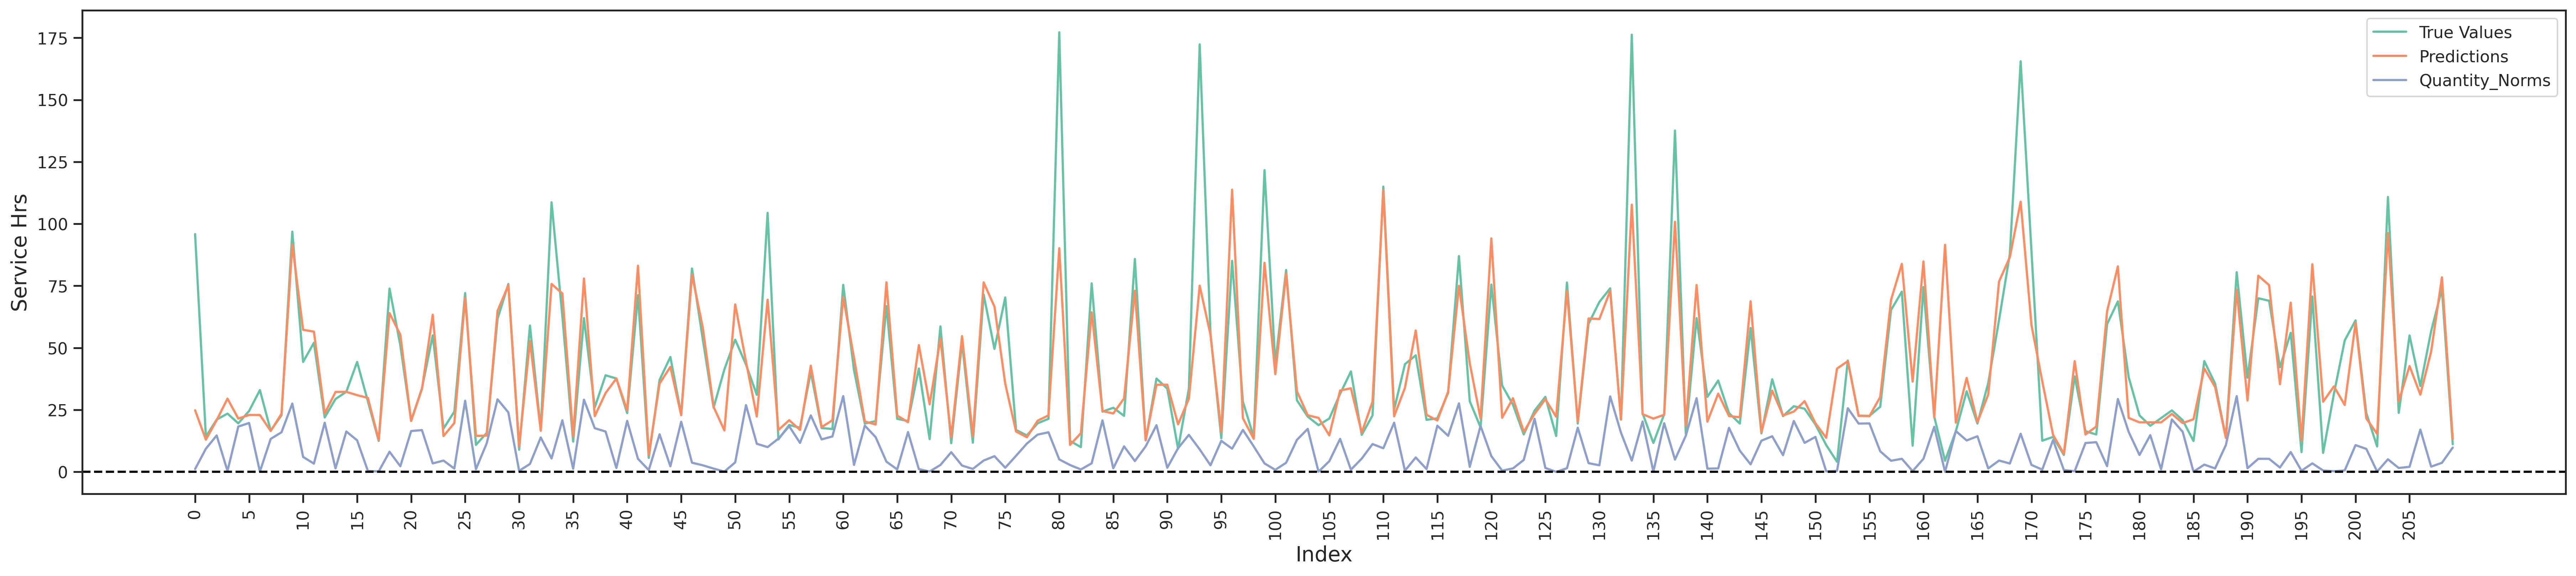

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')
plt.axhline(y=0, color='black', linestyle='--')
x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


plt.xlabel('Index',size = 14)
plt.ylabel('Service Hrs',size = 14)
plt.legend()
plt.show()

In [ ]:
pred = pd.DataFrame(y_pred)
pred.index = y_test.index
pred = pred.rename(columns={0: 'Service Hours in particular berth'})

In [ ]:
error = y_test - pred

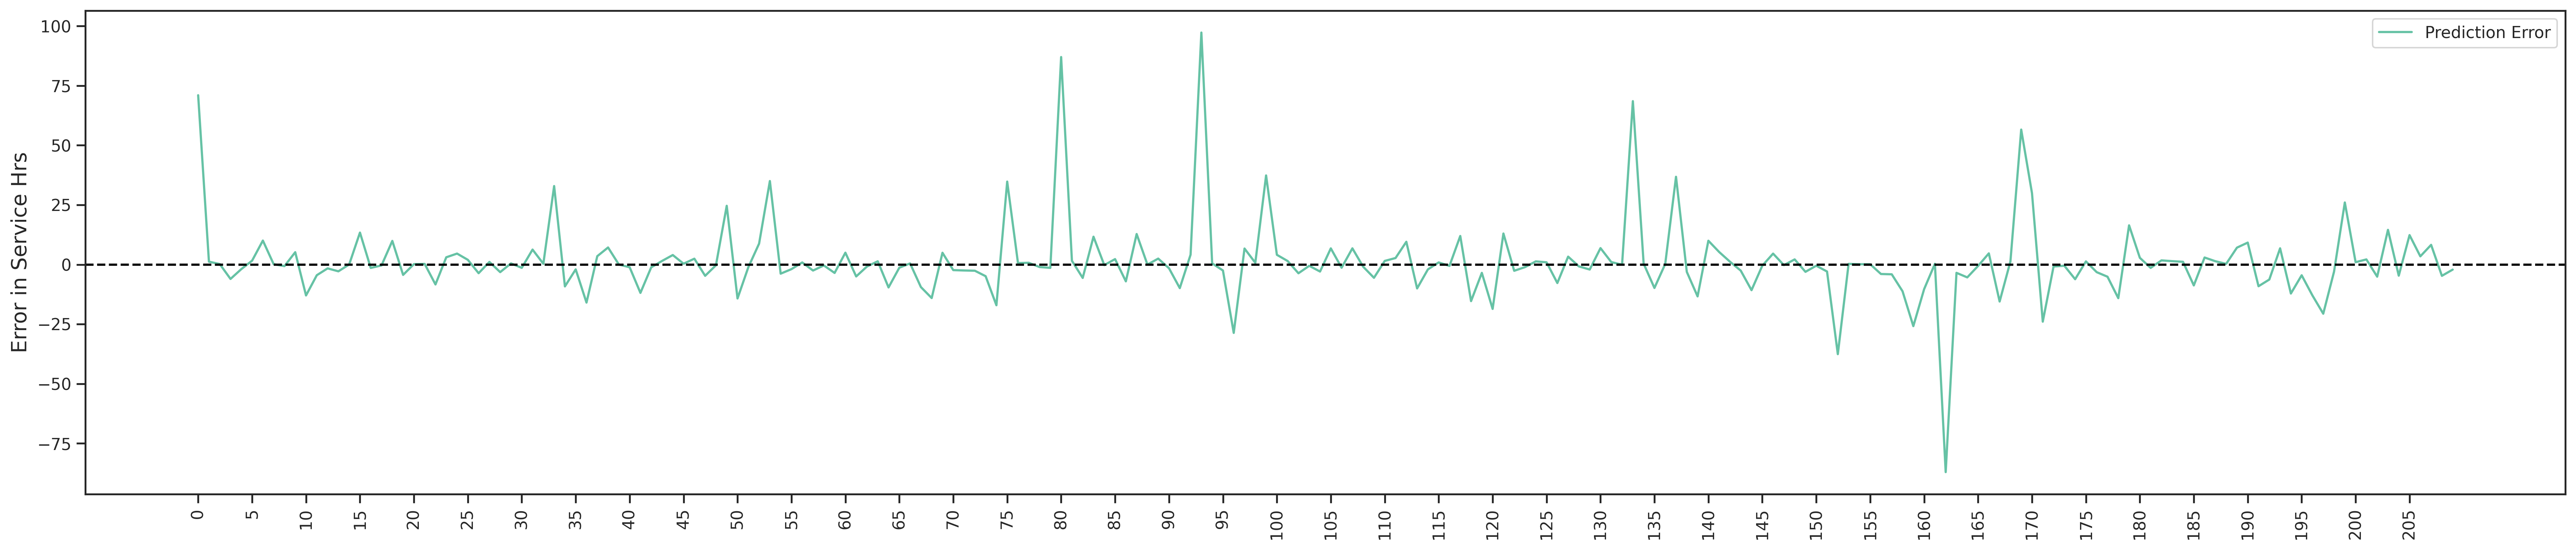

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))

plt.plot(error, label='Prediction Error')
# plt.plot(y_test, label='Actual Service Hrs')
# plt.plot((46.460283+error), label='Fluctuation')
# plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')
plt.axhline(y=0, color='black', linestyle='--')
x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


# plt.xlabel('Index',size = 14)
plt.ylabel('Error in Service Hrs',size = 14)
plt.legend()
plt.show()

In [ ]:
# #Plotting the circle with x,y coordinates. Labels in red are day of year.
# plt.figure(figsize=(12, 12), dpi=80)
# plt.scatter(df1_continuous['month_cos'], df1_continuous['month_sin'])
# # for i in range(len(df1_continuous.index)):
#   plt.text(x=df1_continuous['month_cos'][i]+0.05,y=df1_continuous['month_sin']+0.05,s=df1_continuous.index[i],fontdict=dict(color="red",size=10))

## Pre-Berthing Detention

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -11.559 (1.253)


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

importances = model.feature_importances_

# create a pandas dataframe with the feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the dataframe by importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# print the top 10 features
print(feature_importances.head(25))

<ipython-input-148-78b34617d813>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


                                   Feature  Importance
12                          Quantity_Norms    0.192628
7                                DRAFT_FWD    0.120891
6                                DRAFT_AFT    0.091118
8                                   DWT_MT    0.076205
13                               month_cos    0.075512
14                               month_sin    0.060018
9                                   GRT_MT    0.058279
11                                  NRT_MT    0.050841
10                               LOA_METER    0.045254
0                               BEAM_METER    0.031721
3                        Berth_Permissible    0.018365
38                        REQ_BERTH_CODE_9    0.014036
68               VESSEL_TYPENM_RORO VESSEL    0.012909
5              Congestion_Vessels_Expected    0.011433
45                             ASSESSED_No    0.010124
31                        REQ_BERTH_CODE_2    0.009893
46                            ASSESSED_Yes    0.008076
59     VES

In [ ]:
df1_continuous.describe()

BEAM_METER    Berth_DWT  Berth_Draught  Berth_Permissible  \
count  1046.000000  1046.000000    1046.000000        1046.000000   
mean      0.034232     0.027082       0.026115           0.033587   
std       0.935893     1.002438       1.003535           1.010964   
min      -2.954491    -1.913887      -2.408387          -2.536188   
25%      -0.286777    -0.739292      -1.028880          -0.737688   
50%       0.087353    -0.134721       0.190683           0.071638   
75%       0.892547     1.091695       0.930419           1.240664   
max       2.641201     1.091695       0.930419           1.240664   

       Berth_Quay length  Congestion_Vessels_Expected  DETENTION_HRS  \
count        1046.000000                  1046.000000    1046.000000   
mean            0.049727                    -0.068511       8.933078   
std             0.992376                     0.812954      16.207368   
min            -1.610990                    -0.418897       0.000000   
25%            -1.080390                    -0.418897       0.000000   
50%             0.682384                    -0.418897       0.000000   
75%             0.806191                    -0.418897      12.000000   
max             1.100969                     1.815878      99.000000   

         DRAFT_AFT    DRAFT_FWD       DWT_MT       GRT_MT     Idle Hrs  \
count  1046.000000  1046.000000  1046.000000  1046.000000  1046.000000   
mean      0.048491     0.051858     0.014180     0.018856    12.192859   
std       0.967430     0.962546     0.961998     0.958697    19.852178   
min      -2.634976    -2.320919    -1.401075    -1.594317     0.000000   
25%      -0.328203    -0.492774    -0.610008    -0.544823     0.000000   
50%       0.152374     0.155922    -0.401070    -0.244592     5.985000   
75%       0.472759     0.539243     0.852885     0.754870    15.872500   
max       1.658184     1.630233     2.676652     2.421746   133.340000   

         LOA_METER       NRT_MT  Quantity_Norms  \
count  1046.000000  1046.000000     1046.000000   
mean      0.045255     0.017588        0.032780   
std       0.955841     0.963142        1.003684   
min      -2.588433    -1.414018       -1.023494   
25%      -0.308848    -0.655264       -0.763975   
50%       0.275381    -0.278791       -0.450531   
75%       0.485419     0.871343        0.845445   
max       1.948694     2.602569        2.864225   

       Service Hours in particular berth  Total Berthed Hrs     month_cos  \
count                        1046.000000        1046.000000  1.046000e+03   
mean                           40.417960          52.215488 -1.908614e-02   
std                            29.875682          45.192554  6.971363e-01   
min                             4.100000           4.100000 -1.000000e+00   
25%                            19.500000          20.362500 -5.000000e-01   
50%                            29.068333          36.366667 -1.836970e-16   
75%                            58.155000          74.191667  5.000000e-01   
max                           194.080000         384.500000  1.000000e+00   

          month_sin  
count  1.046000e+03  
mean  -2.682809e-02  
std    7.168493e-01  
min   -1.000000e+00  
25%   -8.660254e-01  
50%   -2.449294e-16  
75%    7.745191e-01  
max    1.000000e+00

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<ipython-input-150-00d4b3251fd2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


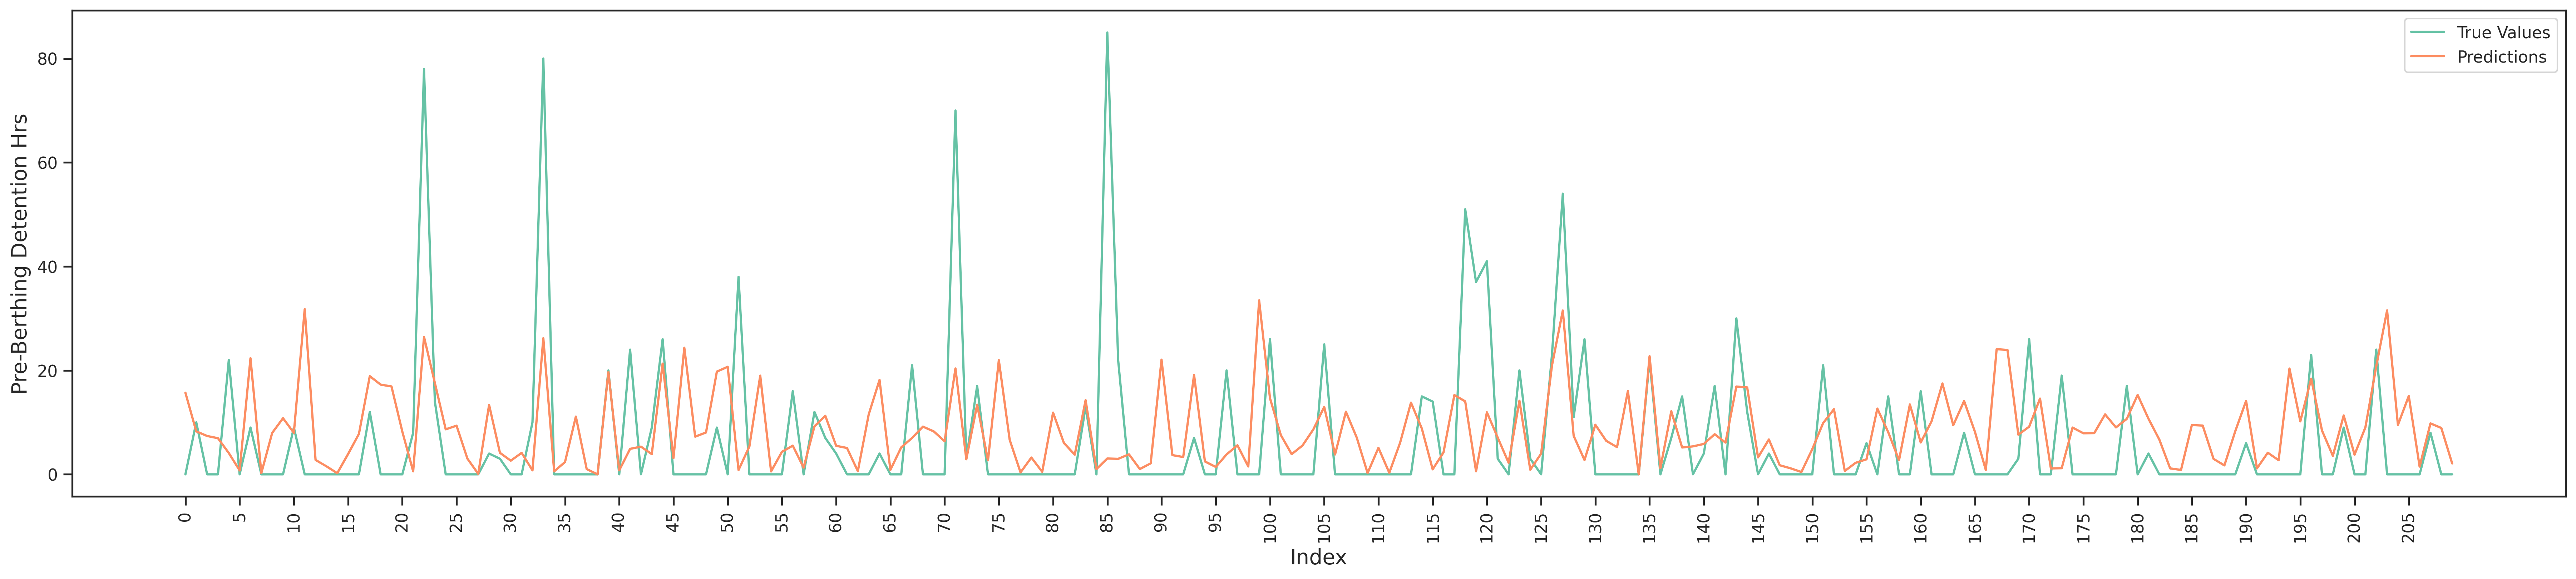

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
# plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')

x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


plt.xlabel('Index',size = 14)
plt.ylabel('Pre-Berthing Detention Hrs',size = 14)
plt.legend()
plt.show()

In [ ]:
pred = pd.DataFrame(y_pred)
pred.index = y_test.index
pred = pred.rename(columns={0: 'DETENTION_HRS'})

In [ ]:
error = y_test - pred

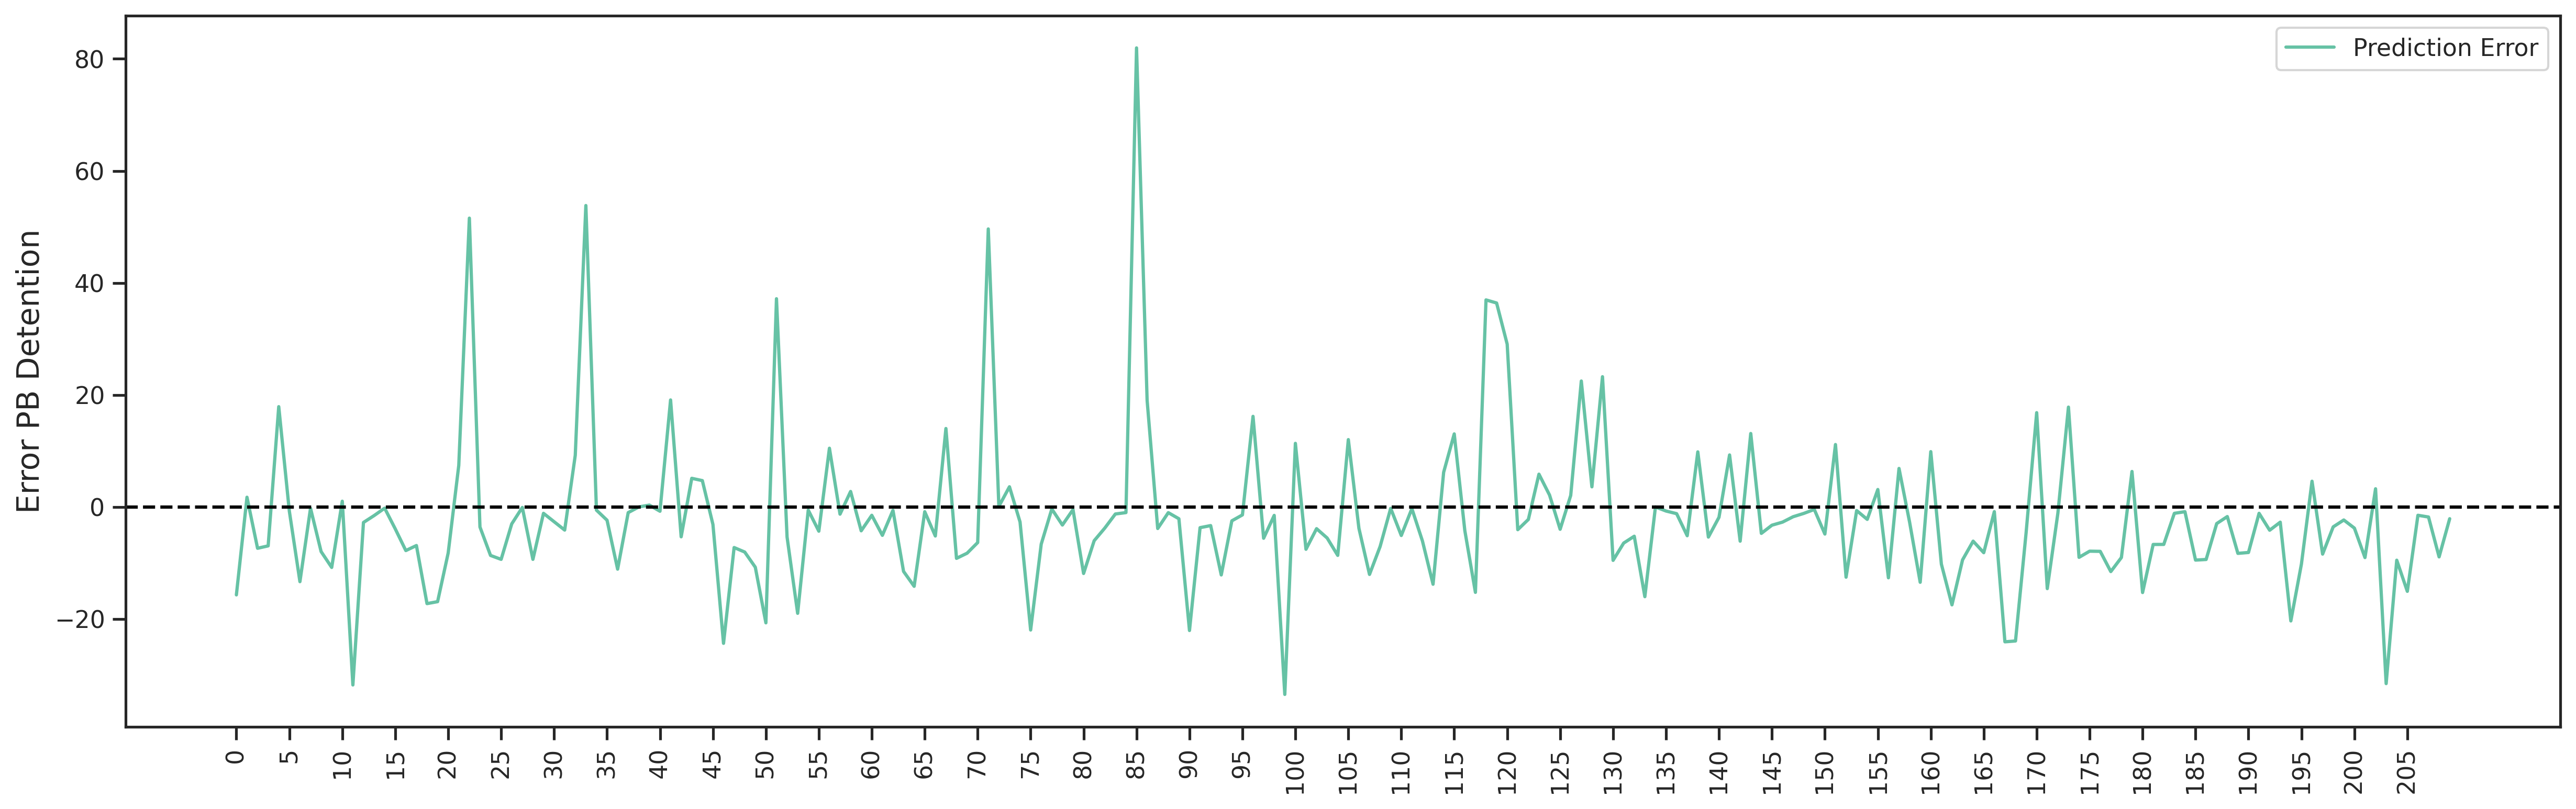

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))

plt.plot(error, label='Prediction Error')
# plt.plot(y_test, label='Actual Service Hrs')
# plt.plot((46.460283+error), label='Fluctuation')
# plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')
plt.axhline(y=0, color='black', linestyle='--')
x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


# plt.xlabel('Index',size = 14)
plt.ylabel('Error PB Detention',size = 14)
plt.legend()
plt.show()

## Idle Hrs 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -5.507 (1.258)


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

importances = model.feature_importances_

# create a pandas dataframe with the feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the dataframe by importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# print the top 10 features
print(feature_importances.head(25))

<ipython-input-156-78b34617d813>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


                       Feature  Importance
49  SHIP_OPERATION_TYPE_Export    0.158688
16               C/B/DB/DC/L_B    0.150423
12              Quantity_Norms    0.070830
7                    DRAFT_FWD    0.063183
18               C/B/DB/DC/L_C    0.055947
6                    DRAFT_AFT    0.048768
4            Berth_Quay length    0.046523
0                   BEAM_METER    0.037762
9                       GRT_MT    0.037358
11                      NRT_MT    0.033809
14                   month_sin    0.028666
17           C/B/DB/DC/L_BARGE    0.028356
19              C/B/DB/DC/L_DC    0.027665
8                       DWT_MT    0.026858
31            REQ_BERTH_CODE_2    0.024272
3            Berth_Permissible    0.023924
10                   LOA_METER    0.022726
13                   month_cos    0.021668
50  SHIP_OPERATION_TYPE_Import    0.017047
32            REQ_BERTH_CODE_3    0.014727
53         VESSEL_TYPENM_BARGE    0.008040
2                Berth_Draught    0.005687
46         

In [ ]:
# def plot_error(y_true, y_pred):
#     error = y_true - y_pred
#     plt.hist(error, bins=25, edgecolor='black', alpha=0.7)
#     plt.xlabel('Prediction Error')
#     plt.ylabel('Count')
#     plt.title('Histogram of Prediction Error')
#     plt.show()

In [ ]:
y_pred

array([ 5.1059,  0.    ,  0.    , 57.4407,  0.    ,  0.    , 12.491 ,
        0.    ,  0.    , 24.0168,  7.9328, 18.9013,  0.    ,  4.4633,
        0.    ,  0.    , 67.5773,  6.0015, 19.0409,  9.5858,  0.    ,
        0.    , 18.3379,  0.    ,  5.3864,  7.9562,  4.9895,  0.    ,
        5.4336,  6.7552,  8.7162,  7.2819,  0.    , 26.0514,  7.1766,
        4.8847,  9.501 ,  0.    ,  0.    , 16.464 ,  0.    , 29.3171,
        0.6237,  0.    ,  6.4354,  0.    , 31.8916,  9.6151,  6.3588,
       15.9826, 32.5316,  0.    ,  0.    , 27.954 ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  6.4568, 17.0658,  0.    ,
        0.    , 11.7807,  4.8507,  0.    , 20.9689, 60.2179, 10.7715,
        0.    , 14.2872,  4.9064, 25.855 ,  8.3987,  9.0931,  0.    ,
        0.    ,  0.    ,  0.    , 33.0808,  0.    ,  6.0292, 23.2019,
        0.    ,  6.4213,  0.    , 35.3966,  0.    ,  0.    ,  6.2403,
        0.    ,  0.    , 13.3034,  8.7564,  0.    , 10.8606,  0.    ,
        0.    , 15.3

In [ ]:
# y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred)
plot_error(y_test, y_pred)

NameError: ignored

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
# plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')

x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


plt.xlabel('Index',size = 14)
plt.ylabel('Idle Hrs',size = 14)
plt.legend()
plt.show()

In [ ]:
pred = pd.DataFrame(y_pred)
pred.index = y_test.index
pred = pred.rename(columns={0: 'Idle Hrs'})

In [ ]:
error = y_test - pred

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))

plt.plot(error, label='Prediction Error')
# plt.plot(y_test, label='Actual Service Hrs')
# plt.plot((46.460283+error), label='Fluctuation')
# plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')
plt.axhline(y=0, color='black', linestyle='--')
x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


# plt.xlabel('Index',size = 14)
plt.ylabel('Error Idle',size = 14)
plt.legend()
plt.show()

## Service Time prediction 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -8.714 (1.478)


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

importances = model.feature_importances_

# create a pandas dataframe with the feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the dataframe by importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# print the top 10 features
print(feature_importances.head(25))

<ipython-input-123-78b34617d813>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


                                Feature  Importance
12                       Quantity_Norms    0.372395
4                     Berth_Quay length    0.148957
3                     Berth_Permissible    0.092424
48             SHIP_OPERATION_TYPE_Both    0.077231
7                             DRAFT_FWD    0.035931
6                             DRAFT_AFT    0.026362
9                                GRT_MT    0.022526
13                            month_cos    0.021617
0                            BEAM_METER    0.019922
8                                DWT_MT    0.019180
11                               NRT_MT    0.018699
21                   C/B/DB/DC/L_HYBRID    0.016904
25                              Berth_2    0.015522
14                            month_sin    0.013259
10                            LOA_METER    0.012168
24                              Berth_1    0.011323
1                             Berth_DWT    0.009945
2                         Berth_Draught    0.005300
61  VESSEL_T

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_pred)
# plt.xlabel('True Values',size = 10)
# plt.ylabel('Predictions',size=10)
# plt.show()

<ipython-input-124-099e096c956b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


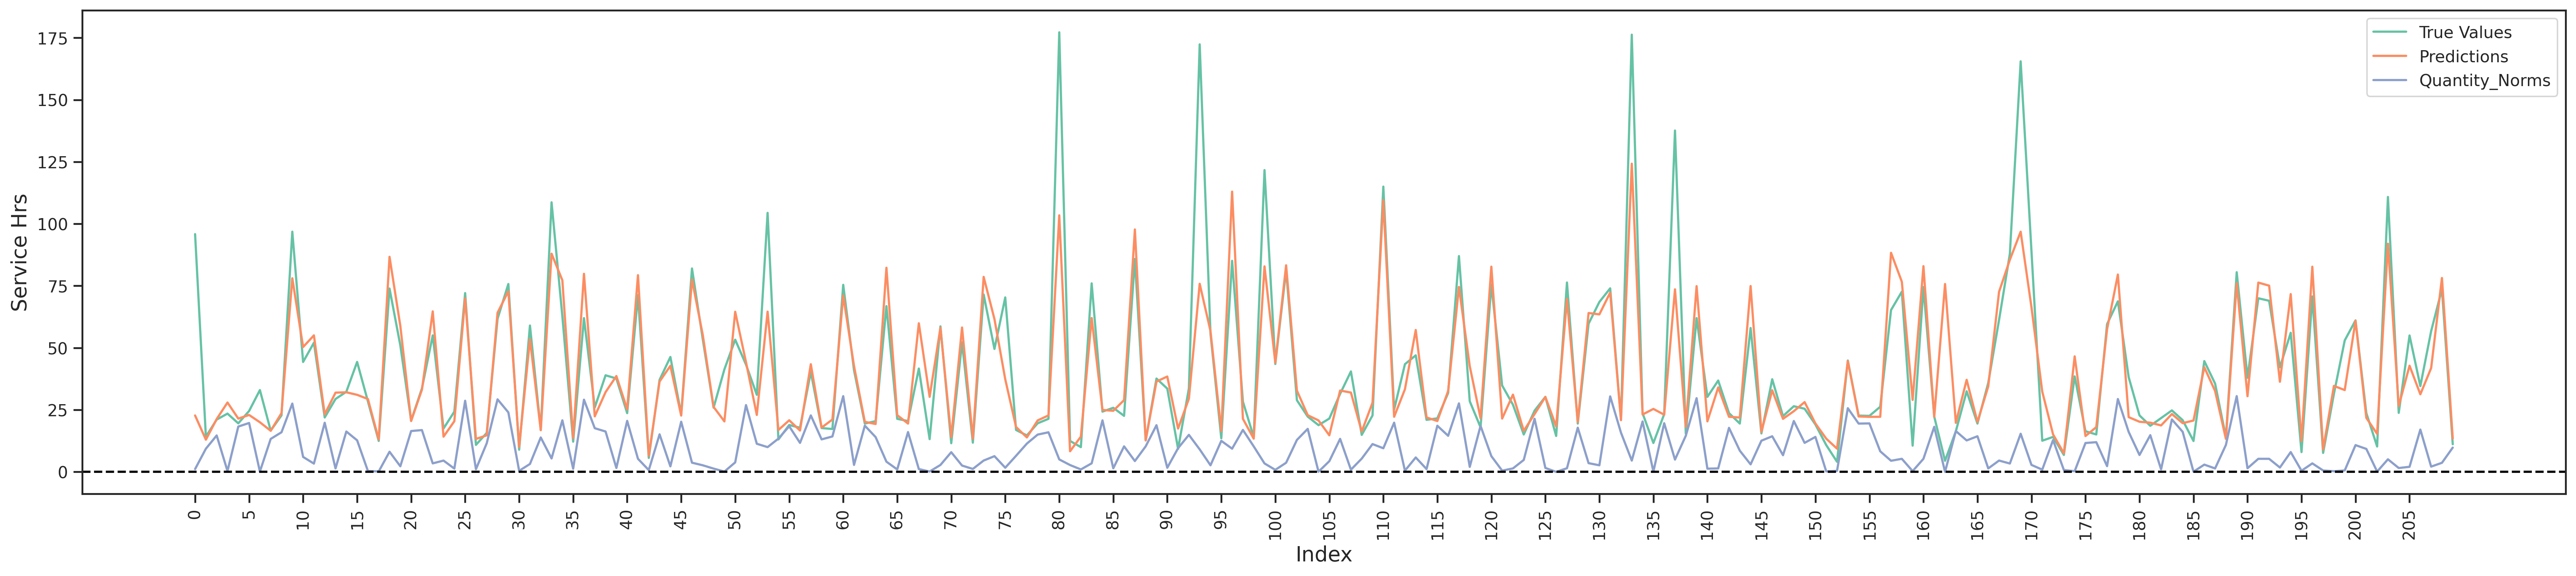

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')
plt.axhline(y=0, color='black', linestyle='--')
x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


plt.xlabel('Index',size = 14)
plt.ylabel('Service Hrs',size = 14)
plt.legend()
plt.show()

In [ ]:
pred = pd.DataFrame(y_pred)
pred.index = y_test.index
pred = pred.rename(columns={0: 'Service Hours in particular berth'})

In [ ]:
error = y_test - pred

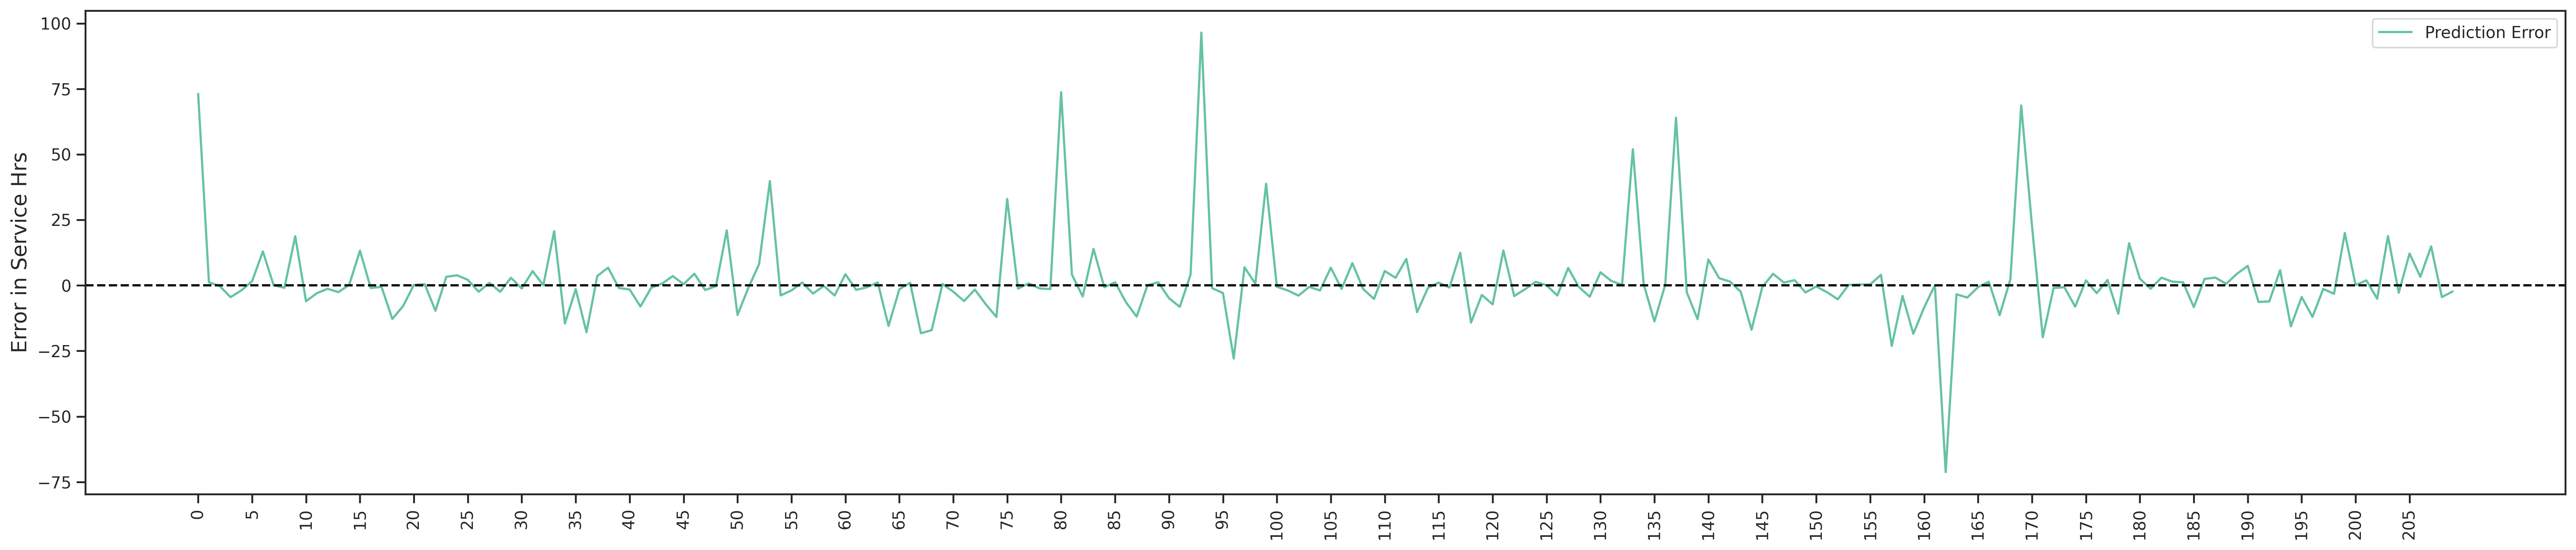

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))

plt.plot(error, label='Prediction Error')
# plt.plot(y_test, label='Actual Service Hrs')
# plt.plot((46.460283+error), label='Fluctuation')
# plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')
plt.axhline(y=0, color='black', linestyle='--')
x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


# plt.xlabel('Index',size = 14)
plt.ylabel('Error in Service Hrs',size = 14)
plt.legend()
plt.show()

## Idle Hrs 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=20, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -5.435 (1.230)


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<ipython-input-130-00d4b3251fd2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


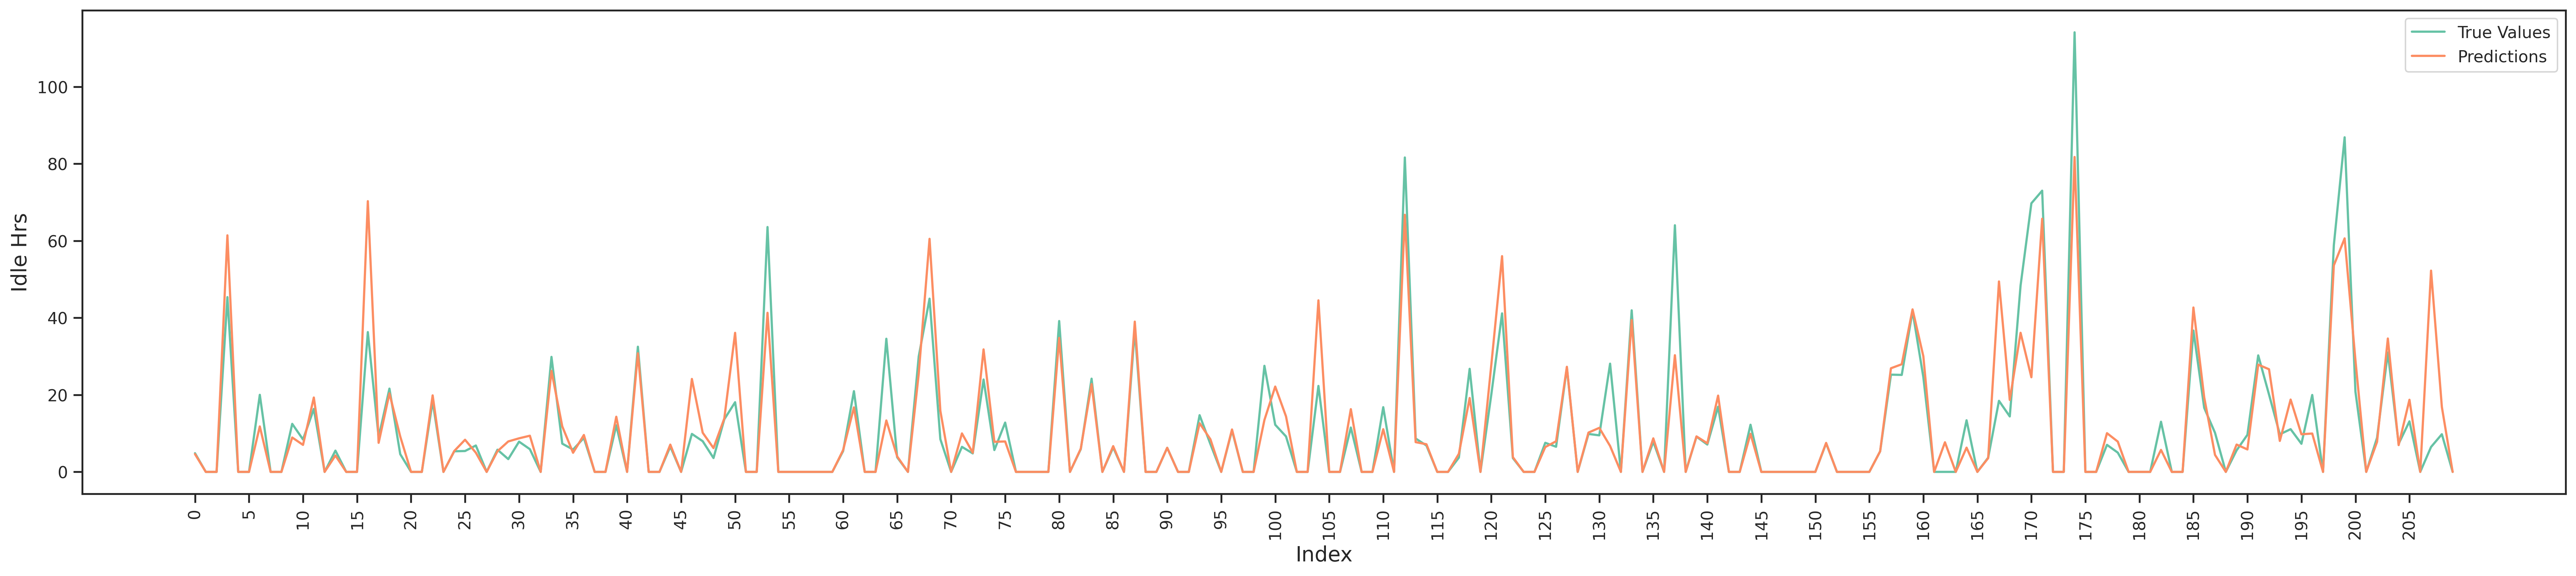

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
# plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')

x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


plt.xlabel('Index',size = 14)
plt.ylabel('Idle Hrs',size = 14)
plt.legend()
plt.show()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

importances = model.feature_importances_

# create a pandas dataframe with the feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the dataframe by importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# print the top 10 features
print(feature_importances.head(25))

<ipython-input-132-78b34617d813>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


                       Feature  Importance
49  SHIP_OPERATION_TYPE_Export    0.151811
16               C/B/DB/DC/L_B    0.129164
4            Berth_Quay length    0.095919
12              Quantity_Norms    0.071642
7                    DRAFT_FWD    0.058344
3            Berth_Permissible    0.044516
6                    DRAFT_AFT    0.042898
0                   BEAM_METER    0.035671
9                       GRT_MT    0.033273
8                       DWT_MT    0.032238
11                      NRT_MT    0.030565
2                Berth_Draught    0.028913
10                   LOA_METER    0.027041
13                   month_cos    0.026606
14                   month_sin    0.024118
17           C/B/DB/DC/L_BARGE    0.022497
50  SHIP_OPERATION_TYPE_Import    0.019363
19              C/B/DB/DC/L_DC    0.017515
24                     Berth_1    0.016070
26                     Berth_3    0.012659
35               Berth_14(CJI)    0.011615
53         VESSEL_TYPENM_BARGE    0.010710
1          

In [ ]:
pred = pd.DataFrame(y_pred)
pred.index = y_test.index
pred = pred.rename(columns={0: 'Idle Hrs'})

In [ ]:
error = y_test - pred

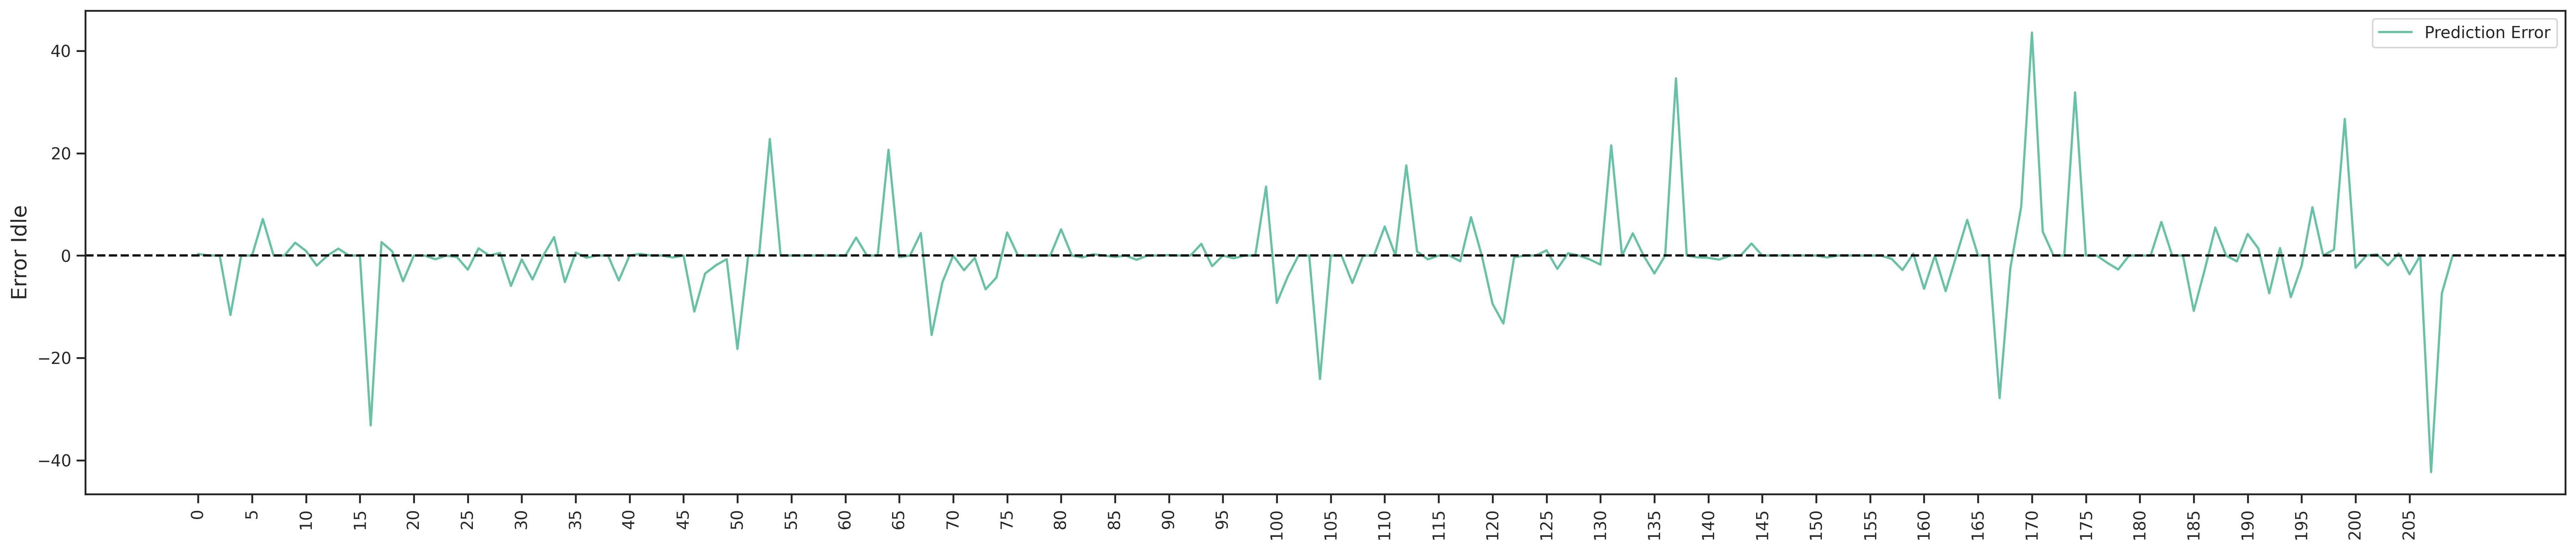

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))

plt.plot(error, label='Prediction Error')
# plt.plot(y_test, label='Actual Service Hrs')
# plt.plot((46.460283+error), label='Fluctuation')
# plt.plot((X_test['Quantity_Norms']*7.974324+8.175745), label = 'Quantity_Norms')
plt.axhline(y=0, color='black', linestyle='--')
x_tick_indices = np.arange(0, len(y_test), 5)
plt.xticks(x_tick_indices, x_tick_indices, rotation=90)


# plt.xlabel('Index',size = 14)
plt.ylabel('Error Idle',size = 14)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.76245857142857